T2-Star-Analysis

Data Loading:
The project begins by importing MRI data from 652 brain structures per mouse, collected one year after radiation exposure. This data includes T2* measurements and volumetric information for each structure. Python's Pandas library is used to load the data from Excel spreadsheets into DataFrames for efficient manipulation and analysis.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
T2_df = pd.read_csv('/Users/njengamacbook/Downloads/mice_T2star_label-DSURQE.csv')

T2_df

,participant_id,group_label,measure,icv,brain,brain_left,brain_right,brain_midline,ventricles,lateral_ventricles,...,cerebellum_lobule9_uvula_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_left,cerebellum_paraflocculus_right,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_wm,cerebellum_paraflocculus_left_gm,cerebellum_paraflocculus_left_wm,cerebellum_paraflocculus_right_gm,cerebellum_paraflocculus_right_wm
0,WBI_1,WBI,mean,35.775463,34.820776,34.990941,34.629745,34.859406,90.284146,96.835729,...,40.301762,15.865227,15.467916,16.496528,15.591053,32.532929,15.229083,35.231363,16.172666,30.299742
1,WBI_2,WBI,mean,35.358459,34.658511,35.666550,34.522295,33.088766,85.870022,76.543660,...,41.271377,13.617552,13.381031,14.042054,13.435261,26.171809,13.263708,22.232404,13.744239,31.769910
2,WBI_3,WBI,mean,35.918806,34.943729,35.306348,35.325781,33.600766,100.051689,112.389209,...,43.643568,14.758024,15.984514,13.792154,14.542449,26.986302,15.845364,23.739464,13.516961,29.624358
3,WBI_4,WBI,mean,34.609697,33.839499,34.215410,34.884656,31.267677,92.608281,102.193988,...,23.232620,13.452355,13.198553,13.719134,13.256793,27.296130,13.047709,24.763290,13.477049,29.575686
4,WBI_5,WBI,mean,34.960803,34.516823,34.704141,34.946316,33.305303,73.457068,70.473554,...,41.725010,14.940205,14.591933,15.327643,14.757247,26.070207,14.421469,27.108854,15.132986,25.262371
5,WBI_6,WBI,mean,35.434513,34.907099,35.361598,35.159321,33.588651,78.591903,82.782682,...,36.834159,16.038812,16.634267,15.359694,15.850989,27.630602,16.489120,26.524303,15.120852,28.665526
6,RT_1,RT,mean,36.278057,35.366274,36.638524,35.398821,32.922686,100.803143,108.268704,...,38.662777,14.953552,15.002952,14.901939,14.766993,28.131665,14.866039,25.246949,14.663346,30.824066
7,RT_2,RT,mean,36.537519,35.876374,37.990148,36.722056,30.172318,82.878093,84.397913,...,24.027706,16.190146,16.295631,16.077073,15.796040,40.276981,15.826298,45.412307,15.763589,34.936242
8,RT_3,RT,mean,41.434876,40.739273,40.016407,40.849681,41.691328,80.746493,86.670941,...,34.734221,15.153690,15.972523,13.880542,14.970776,26.636096,15.802682,26.789243,13.676559,26.406376
9,RT_4,RT,mean,39.252119,38.246789,40.026430,39.173561,33.538484,107.212967,115.201600,...,34.837269,16.775392,19.589249,14.697107,16.429260,38.741409,19.227762,43.740055,14.359520,35.355229


In [ ]:
len(T2_df)

22

In [ ]:
#Create groups of WBI/C & RBI/C

T2_WBI_df = T2_df.iloc[0:6, :]
T2_RT_df = T2_df.iloc[6:12, :]
T2_RC_df = T2_df.iloc[12:16, :]
T2_WBIC_df = T2_df.iloc[16:22, :]


#start at the desired column 
start_column_index = 8

T2_WBI_data = T2_WBI_df.iloc[:, start_column_index:]
T2_WBIC_data = T2_WBIC_df.iloc[:, start_column_index:]
T2_RT_data = T2_RT_df.iloc[:, start_column_index:]
T2_RC_data = T2_RC_df.iloc[:, start_column_index:]

In [ ]:
#desrcribe the dfs 
T2_WBI_describe = T2_WBI_df.describe()
T2_RT_describe = T2_RT_df.describe()
T2_RC_describe = T2_RC_df.describe()
T2_WBIC_describe = T2_WBIC_df.describe()


#then get the mean row 
T2_WBIC_means = T2_WBIC_describe.loc['mean', 'ventricles':]  # Access row 'mean' and all columns
T2_RT_means = T2_RT_describe.loc['mean', 'ventricles':]
T2_RC_means = T2_RC_describe.loc['mean', 'ventricles':]
T2_WBI_means = T2_WBI_describe.loc['mean', 'ventricles':]


Preprocessing:
Initial preprocessing involves organizing the data into control and experimental groups. The SciPy stats package is utilized to perform t-tests, assessing statistical significance of differences between these groups for both volume and T2* measurements. A threshold of p < 0.05 is applied to identify significantly different regions.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

def compare_dataframes(T2_WBIC_data, T2_WBI_data):
  """
  Performs pairwise t-tests between columns of two DataFrames.

  Args:
    control_df: DataFrame containing control group data.
    experimental_df: DataFrame containing experimental group data.

  Returns:
    A DataFrame with column names, t-statistics, and p-values.
  """

  results = []
  for col in T2_WBIC_data.columns:
    t_stat, p_value = ttest_ind(T2_WBIC_data[col], T2_WBI_data[col])
    results.append({'column': col, 't_statistic': t_stat, 'p_value': p_value})
  return pd.DataFrame(results)


T2_result_df = compare_dataframes(T2_WBIC_data, T2_WBI_data)
print(T2_result_df)
print('length of dataframe: ', len(T2_result_df))

                                column  t_statistic   p_value
0                           ventricles     2.416195  0.036297
1                   lateral_ventricles     2.139342  0.058099
2               lateral_ventricle_left     1.405041  0.190304
3              lateral_ventricle_right     2.468750  0.033176
4                    cerebral_aqueduct     1.184963  0.263429
..                                 ...          ...       ...
640        cerebellum_paraflocculus_wm     2.080189  0.064177
641   cerebellum_paraflocculus_left_gm     1.006330  0.337986
642   cerebellum_paraflocculus_left_wm     0.273315  0.790172
643  cerebellum_paraflocculus_right_gm     1.918533  0.084012
644  cerebellum_paraflocculus_right_wm     2.418616  0.036147

[645 rows x 3 columns]
length of dataframe:  645


In [ ]:
T2_result_df.describe()

,t_statistic,p_value
count,612.000000,612.000000
mean,0.998155,0.394050
std,1.447073,0.289291
min,-2.943764,0.000005
25%,0.156135,0.142010
50%,0.887075,0.347761
75%,1.495226,0.630155
max,8.901768,0.999068


In [ ]:
def filter_significant_results(T2_result_df, alpha=0.05):
  """
  Filters significant results based on p-value.

  Args:
    result_df: DataFrame containing t-test results.
    alpha: Significance level.

  Returns:
    DataFrame with significant results.
  """

  significant_results = T2_result_df[T2_result_df['p_value'] < alpha]
  return significant_results

T2_result_df = compare_dataframes(T2_WBIC_data, T2_WBI_data)
T2_significant_results = filter_significant_results(T2_result_df, alpha=0.05)
print(T2_significant_results)
#print('there are this many signficant values for T2: ',len(T2_significant_results))

                                         column  t_statistic   p_value
0                                    ventricles     2.416195  0.036297
3                       lateral_ventricle_right     2.468750  0.033176
7                                      total_gm     7.764562  0.000015
8                                      total_wm     3.354419  0.007311
9                                       left_gm     8.055075  0.000011
..                                          ...          ...       ...
609  cerebellum_lobule7_crus2_ansiform_right_gm     2.235893  0.049347
632               cerebellum_lobule8_pyramis_wm    -2.943764  0.014691
636                    cerebellum_paraflocculus     2.353970  0.040366
639                 cerebellum_paraflocculus_gm     2.339441  0.041379
644           cerebellum_paraflocculus_right_wm     2.418616  0.036147

[85 rows x 3 columns]


In [ ]:
T2_significant_results.to_excel("T2_dataframe.xlsx", index=False)

print("DataFrame saved as 'dataframe.xlsx'!")

DataFrame saved as 'dataframe.xlsx'!


In [ ]:
#Now lets re-load all of the old data 
df = pd.read_csv('/Users/njengamacbook/Desktop/Fall 24/Petronek Lab/grumbach_mice_volume_label-DSURQE (4).csv')

df

,participant_id,group_label,measure,icv,brain,brain_left,brain_right,brain_midline,ventricles,lateral_ventricles,...,cerebellum_lobule9_uvula_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_left,cerebellum_paraflocculus_right,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_wm,cerebellum_paraflocculus_left_gm,cerebellum_paraflocculus_left_wm,cerebellum_paraflocculus_right_gm,cerebellum_paraflocculus_right_wm
0,WBI_1,WBI,volume,411.846813,407.150778,162.190843,162.416276,82.543659,4.696036,2.931607,...,0.025373,2.896474,1.525333,1.371141,2.849631,0.046843,1.504839,0.020494,1.344792,0.026349
1,WBI_2,WBI,volume,428.047241,422.442572,165.718845,165.387034,91.336692,5.604670,3.858761,...,0.028301,4.001244,2.046490,1.954754,3.945617,0.055627,2.020140,0.026350,1.925477,0.029277
2,WBI_3,WBI,volume,447.051774,440.805812,174.455563,173.320555,93.029694,6.245962,4.227735,...,0.032206,4.058899,2.071903,1.986997,4.002295,0.056604,2.044576,0.027326,1.957719,0.029278
3,WBI_4,WBI,volume,432.470149,427.250283,170.205302,166.553640,90.491341,5.219866,3.281811,...,0.028300,3.676058,1.960499,1.715559,3.617507,0.058551,1.932199,0.028300,1.685307,0.030252
4,WBI_5,WBI,volume,421.229237,414.924217,162.360377,162.516515,90.047325,6.305021,4.428445,...,0.034155,3.267174,1.439391,1.827783,3.210574,0.056600,1.414019,0.025372,1.796555,0.031227
5,WBI_6,WBI,volume,432.567458,426.661690,167.191487,166.617600,92.852602,5.905768,3.860074,...,0.036112,3.144667,2.022269,1.122398,3.099772,0.044896,1.995917,0.026352,1.103854,0.018544
6,RT_1,RT,volume,415.531784,408.311797,153.706268,156.178318,98.427211,7.219986,4.631800,...,0.044893,4.984113,3.035166,1.948947,4.906038,0.078075,2.988321,0.046845,1.917717,0.031230
7,RT_2,RT,volume,441.835586,434.210681,168.673091,169.672438,95.865152,7.624905,5.309034,...,0.046844,3.199083,1.964538,1.234546,3.147359,0.051724,1.941116,0.023422,1.206244,0.028302
8,RT_3,RT,volume,440.202077,432.876796,162.182024,164.464037,106.230734,7.325281,4.818776,...,0.060515,3.464990,1.971628,1.493362,3.410331,0.054659,1.943323,0.028306,1.467008,0.026353
9,RT_4,RT,volume,475.720305,468.740895,183.790468,180.061154,104.889273,6.979410,4.678967,...,0.047824,3.289136,1.389831,1.899305,3.238384,0.050752,1.369335,0.020496,1.869049,0.030256


In [ ]:
WBI_df = df.iloc[0:6, :]
RT_df = df.iloc[6:12, :]
RC_df = df.iloc[12:16, :]
WBIC_df = df.iloc[16:22, :]


#start at the desired column 
start_column_index = 8

WBI_data = WBI_df.iloc[:, start_column_index:]
WBIC_data = WBIC_df.iloc[:, start_column_index:]
RT_data = RT_df.iloc[:, start_column_index:]
RC_data = RC_df.iloc[:, start_column_index:]


#desrcribe the dfs 
WBI_describe = WBI_df.describe()
RT_describe = RT_df.describe()
RC_describe = RC_df.describe()
WBIC_describe = WBIC_df.describe()


#then get the mean row 
WBIC_means = WBIC_describe.loc['mean', 'ventricles':]  # Access row 'mean' and all columns
RT_means = RT_describe.loc['mean', 'ventricles':]
RC_means = RC_describe.loc['mean', 'ventricles':]
WBI_means = WBI_describe.loc['mean', 'ventricles':]



In [ ]:
#Compare the dfs 

def compare_dataframes(WBIC_data, WBI_data):
  """
  Performs pairwise t-tests between columns of two DataFrames.

  Args:
    control_df: DataFrame containing control group data.
    experimental_df: DataFrame containing experimental group data.

  Returns:
    A DataFrame with column names, t-statistics, and p-values.
  """

  results = []
  for col in WBIC_data.columns:
    t_stat, p_value = ttest_ind(WBIC_data[col], WBI_data[col])
    results.append({'column': col, 't_statistic': t_stat, 'p_value': p_value})
  return pd.DataFrame(results)


result_df = compare_dataframes(WBIC_data, WBI_data)
print(result_df)
print('length of dataframe: ', len(result_df))

                                column  t_statistic   p_value
0                           ventricles    -0.010801  0.991595
1                   lateral_ventricles    -0.127694  0.900922
2               lateral_ventricle_left    -0.839545  0.420781
3              lateral_ventricle_right     0.461945  0.654007
4                    cerebral_aqueduct     0.307729  0.764602
..                                 ...          ...       ...
640        cerebellum_paraflocculus_wm     0.000630  0.999510
641   cerebellum_paraflocculus_left_gm     0.797558  0.443653
642   cerebellum_paraflocculus_left_wm     0.274134  0.789561
643  cerebellum_paraflocculus_right_gm    -0.266887  0.794979
644  cerebellum_paraflocculus_right_wm    -0.235914  0.818261

[645 rows x 3 columns]
length of dataframe:  645


In [ ]:
#Save the statiscially signficiant subanatomic features 
alpha=0.05
significant_results = result_df[result_df['p_value'] < alpha]
print(significant_results) 
#significant_results.to_excel("significant_dataframe.xlsx", index=False)

#rank them for 
print("DataFrame saved as 'dataframe.xlsx'!")

                            column  t_statistic   p_value
7                         total_gm     5.529229  0.000251
9                          left_gm     4.863293  0.000658
10                        right_gm     6.257869  0.000094
11                      midline_gm     3.537552  0.005379
14                      midline_wm     2.807573  0.018552
..                             ...          ...       ...
631  cerebellum_lobule8_pyramis_gm     5.505770  0.000260
632  cerebellum_lobule8_pyramis_wm     4.898846  0.000624
633       cerebellum_lobule9_uvula     5.439937  0.000285
634    cerebellum_lobule9_uvula_gm     5.383962  0.000308
635    cerebellum_lobule9_uvula_wm     3.113135  0.011002

[301 rows x 3 columns]
DataFrame saved as 'dataframe.xlsx'!


In [ ]:
#Get the signficiant figures 
def filter_significant_results(result_df, alpha=0.05):
  """
  Filters significant results based on p-value.

  Args:
    result_df: DataFrame containing t-test results.
    alpha: Significance level.

  Returns:
    DataFrame with significant results.
  """

  significant_results = result_df[result_df['p_value'] < alpha]
  return significant_results

result_df = compare_dataframes(WBIC_data, WBI_data)
significant_results = filter_significant_results(result_df, alpha=0.05)


#!THESE ARE ONLY THE NAMES OF THE COLUMNS 
significant_results = significant_results['column']

#print(significant_results)
print('there are this many signficant values : ',len(significant_results))

#step 1 is to get all of the names from the column 
# step 2 is to then intiailize the index with that column 

print('there are this many signficant values t2 : ',len(T2_significant_results))

sig_col_names= list(significant_results)
t2_sig_col = list(T2_significant_results)

t2_sig_col = list(T2_significant_results['column'])

there are this many signficant values :  301
there are this many signficant values t2 :  85


Data Cleaning:
Redundant regional substructures (e.g., left versus right hemispheres) are removed from the dataset, as the whole brain was irradiated uniformly. This step reduces the number of significant structures to 50 for volume changes and 50 for T2* changes.

In [ ]:

print('there are this many signficant values : ',len(significant_results))

#step 1 is to get all of the names from the column 
# step 2 is to then intiailize the index with that column 

#print(T2_significant_results)
print('there are this many signficant values : ',len(T2_significant_results))


common_columns = significant_results.index.intersection(T2_significant_results.index).tolist()

print('there are this many common columns between volume & t2: ', len(common_columns))



significant_results

sig_column_names = [item for item in significant_results]
t2_column_names = [item for item in T2_significant_results]



unique_values = list(set(sig_column_names + t2_column_names))
print(unique_values)


there are this many signficant values :  301
there are this many signficant values :  85
there are this many common columns between volume & t2:  50
['motor_cortex', 'entorhinal_cortex_medial', 'primary_somatosensory_cortex_hindlimb', 'primary_somatosensory_cortex_barrel_right', 'entorhinal_cortex_caudomedial_right', 't_statistic', 'ectorhinal_cortex', 'claustrum_endopiriform_ventral_nucleus', 'secondary_visual_cortex_right', 'ectorhinal_cortex_left', 'rostral_amydalopiriform_area', 'midline_wm', 'claustrum_left', 'cerebellum', 'cingulate', 'olfactory_bulb_granular', 'cingulate_gm', 'secondary_auditory_cortex_left', 'entorhinal_cortex_left', 'secondary_auditory_cortex_dorsal', 'tenia_tecta_dorsal_right', 'secondary_visual_cortex_left', 'primary_somatosensory_cortex_dysgranular_left', 'cerebellum_crus2_paramedian_trunk_wm', 'superior_colliculus_left', 'cerebellum_left_wm', 'cerebellum_left', 'cerebellum_wm', 'primary_somatosensory', 'tenia_tecta_ventral_right', 'lateral_olfactory_tract_

In [ ]:
from collections import Counter

combined_list = sig_column_names + t2_column_names
unique_values_with_counts = Counter(combined_list)
#print(unique_values_with_counts)

unique_values = unique_values_with_counts.keys()
#print((unique_values))


#DICTIONARY CONTATING THE UNIQUE NAMES AND THEIR INDEXS IN THE DF
unique_dict= {'total_gm': 7, 'left_gm': 9, 'right_gm': 10, 'cerebrum': 15, 'cerebrum_left': 16, 'cerebrum_right': 17, 'cerebrum_gm': 18, 'cerebrum_left_gm': 20, 'cerebrum_right_gm': 22, 'claustrum_ventral': 172, 'claustrum_ventral_left': 182, 'somatosensory_cortex_right': 212, 'secondary_somatosensory': 216, 'primary_somatosensory_cortex_jaw_right': 233, 'entorhinal_cortex_dorsal_intermediate': 267, 'entorhinal_cortex_dorsal_intermediate_left': 268, 'entorhinal_cortex_dorsolateral':  270, 'perirhinal_cortex': 279, 'secondary_visual_cortex':  333, 'olfactory':  354, 'olfactory_left':  355, 'olfactory_right': 356, 'olfactory_bulb': 357, 'olfactory_bulb_left': 358, 'olfactory_bulb_right': 359, 'olfactory_bulb_external_plexiform': 360, 'olfactory_bulb_external_plexiform_left': 361, 'olfactory_bulb_external_plexiform_right':362, 'olfactory_bulb_glomerular': 363, 'olfactory_bulb_glomerular_left': 364, 'olfactory_bulb_glomerular_right': 365, 'olfactory_bulb_granular': 366, 'olfactory_bulb_granular_left': 367, 'olfactory_bulb_granular_right': 368, 'olfactory_bulb_internal_plexiform': 369, 'olfactory_bulb_internal_plexiform_right': 371, 'olfactory_bulb_mitral': 372, 'olfactory_bulb_mitral_left': 373, 'lateral_olfactory_tract': 393, 'lateral_olfactory_tract_left': 394, 'lateral_olfactory_tract_right': 395, 'globus_pallidus_right': 410, 'hypothalamus':  414, 'hypothalamus_left': 415, 'mammilary_body_left': 421, 'cerebellum_lobule6_simple_right_wm': 601, 'cerebellum_lobule7_crus2_ansiform': 602, 'cerebellum_lobule7_crus2_ansiform_gm': 605, 'cerebellum_lobule7_crus2_ansiform_right_gm': 609, 'cerebellum_lobule8_pyramis_wm': 632}
print(unique_dict)

column_names = list(unique_dict.keys())
print(column_names)
print('the length of the common columns',len(column_names))

{'total_gm': 7, 'left_gm': 9, 'right_gm': 10, 'cerebrum': 15, 'cerebrum_left': 16, 'cerebrum_right': 17, 'cerebrum_gm': 18, 'cerebrum_left_gm': 20, 'cerebrum_right_gm': 22, 'claustrum_ventral': 172, 'claustrum_ventral_left': 182, 'somatosensory_cortex_right': 212, 'secondary_somatosensory': 216, 'primary_somatosensory_cortex_jaw_right': 233, 'entorhinal_cortex_dorsal_intermediate': 267, 'entorhinal_cortex_dorsal_intermediate_left': 268, 'entorhinal_cortex_dorsolateral': 270, 'perirhinal_cortex': 279, 'secondary_visual_cortex': 333, 'olfactory': 354, 'olfactory_left': 355, 'olfactory_right': 356, 'olfactory_bulb': 357, 'olfactory_bulb_left': 358, 'olfactory_bulb_right': 359, 'olfactory_bulb_external_plexiform': 360, 'olfactory_bulb_external_plexiform_left': 361, 'olfactory_bulb_external_plexiform_right': 362, 'olfactory_bulb_glomerular': 363, 'olfactory_bulb_glomerular_left': 364, 'olfactory_bulb_glomerular_right': 365, 'olfactory_bulb_granular': 366, 'olfactory_bulb_granular_left': 367

In [ ]:
#take the keys from this dictionary and get go through the corresponding columns in the df 
#then we can get those values and get the z-scores

In [ ]:
#now lets compare the names of the columns and give back which ones are signfigcant 
sig_fig_col = significant_results.index
T2_sig_fig_col = T2_significant_results.index

#a df with all the positions of the common ones 
common_columns = sig_fig_col.intersection(T2_sig_fig_col).tolist()



print("Common columns:", common_columns)
print("Common columns length:", len(common_columns))

Common columns: [7, 9, 10, 15, 16, 17, 18, 20, 22, 172, 182, 212, 216, 233, 267, 268, 270, 279, 333, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 371, 372, 373, 393, 394, 395, 410, 414, 415, 421, 601, 602, 605, 609, 632]
Common columns length: 50


In [ ]:
#take the keys from this dictionary and get go through the corresponding columns in the df 

keys_list = list(unique_dict.keys())
#print(keys_list)

# Extract columns from the original DataFrames
WBI_extracted_df = WBI_means[keys_list]
WBIC_extracted_df = WBIC_means[keys_list]

#print(WBIC_extracted_df)

difference_df = WBIC_extracted_df - WBI_extracted_df

print(difference_df)
print('this is how big the combined df is: ', len(difference_df))
#go through the df w/ the names of the unique cols, then get those means values *hard code??
#then we can get those values and get the z-scores





total_gm                                      30.751583
left_gm                                       11.852129
right_gm                                      12.597066
cerebrum                                      19.590566
cerebrum_left                                  9.796183
cerebrum_right                                 9.794216
cerebrum_gm                                   18.577786
cerebrum_left_gm                               9.328902
cerebrum_right_gm                              9.263992
claustrum_ventral                              0.035962
claustrum_ventral_left                         0.025218
somatosensory_cortex_right                     1.138205
secondary_somatosensory                        0.381010
primary_somatosensory_cortex_jaw_right         0.036936
entorhinal_cortex_dorsal_intermediate          0.134411
entorhinal_cortex_dorsal_intermediate_left     0.076964
entorhinal_cortex_dorsolateral                 0.190395
perirhinal_cortex                              0

Feature Extraction:
The script calculates the differences (Δ) between experimental and control group means for both volume and T2* measurements. These differences are then converted to z-scores using the control group's standard deviation, allowing for standardized comparison across different brain regions.

In [ ]:
#extract the means and std 
WBI_mean=WBI_means[keys_list]
WBIC_mean = WBIC_means[keys_list]

WBIC_describe_means = WBIC_describe[keys_list].iloc[1]
WBIC_describe_means

WBIC_describe_std = WBIC_describe[keys_list].iloc[2]
WBIC_describe_std

WBI_describe_std = WBI_describe[keys_list].iloc[2]
WBI_describe_std


#subtracted means & std of WBIC/WBI
subtracted_means = list(WBIC_mean - WBI_mean)
subtracted_std = list(WBIC_describe_std - WBI_describe_std)




In [ ]:
#z-scores 
import scipy.stats as stats
WBIC_z=WBIC_data[keys_list]
WBI_z=WBI_data[keys_list]

WBIC_zscores = WBIC_z.apply(stats.zscore)
WBIC_zscores


WBI_zscores = WBI_z.apply(stats.zscore)
WBI_zscores

#next step would to probably be get take the 2 z-scores, get their means, then graph the means of change

WBIC_zscore = WBIC_zscores.describe()

In [ ]:
#remeber you are turning each group into 1 df because you want to graph the means of the changes. 
#then you can graph them 
WBIC_zscore = WBIC_zscores.describe()
WBIC_zscore_mean = WBIC_zscore.iloc[1]
WBIC_zscore_std = WBIC_zscore.iloc[2]

WBI_zscore = WBI_zscores.describe()
WBI_zscore_mean = WBI_zscore.iloc[1]
WBI_zscore_std = WBI_zscore.iloc[2]

In [ ]:
WBIC_zscore = WBIC_zscores.describe()
WBIC_zscore_mean = pd.DataFrame(WBIC_zscore_mean)


WBI_zscore = WBI_zscores.describe()
WBI_zscore_mean = pd.DataFrame(WBI_zscore_mean)


In [ ]:
#then we can make a gray-scaled heatmap of the differences 
#use the names of the columns as the y-axis 

import matplotlib.pyplot as plt


In [ ]:
WBIC_zscore = WBIC_zscores.describe()
WBIC_zscore_mean = pd.DataFrame(WBIC_zscore_mean)
WBIC_zscore_mean

WBI_zscore = WBI_zscores.describe()
WBIC_zscore_mean = pd.DataFrame(WBIC_zscore_mean)
WBI_zscore_mean

,mean
total_gm,-5.097774e-15
left_gm,-1.216619e-15
right_gm,-2.988350e-15
cerebrum,5.777786e-15
cerebrum_left,-2.553513e-15
cerebrum_right,7.993606e-15
cerebrum_gm,2.349972e-15
cerebrum_left_gm,9.251859e-18
cerebrum_right_gm,-3.571217e-15
claustrum_ventral,1.628327e-15


In [ ]:
#These are the names of each unique column from the total 50
#JUST THE NAMES
right_cols = [
    'right_gm',
    'cerebrum_right',
    'cerebrum_right_gm',
    'somatosensory_cortex_right',
    'primary_somatosensory_cortex_jaw_right',
    'olfactory_right',
    'olfactory_bulb_right',
    'olfactory_bulb_external_plexiform_right',
    'olfactory_bulb_glomerular_right',
    'olfactory_bulb_granular_right',
    'olfactory_bulb_internal_plexiform_right',
    'lateral_olfactory_tract_right',
    'globus_pallidus_right',
    'cerebellum_lobule6_simple_right_wm',
    'cerebellum_lobule7_crus2_ansiform_right_gm'
]

#unique to right side are 
#'somatosensory_cortex_right', 

left_cols = [
    'left_gm',
    'cerebrum_left',
    'cerebrum_left_gm',
    'claustrum_ventral_left',
    'entorhinal_cortex_dorsal_intermediate_left',
    'olfactory_left',
    'olfactory_bulb_left',
    'olfactory_bulb_external_plexiform_left',
    'olfactory_bulb_glomerular_left',
    'olfactory_bulb_granular_left',
    'olfactory_bulb_mitral_left',
    'lateral_olfactory_tract_left',
    'hypothalamus_left',
    'mammilary_body_left'
]

#unique to left side are 
#'mammilary_body_left', 

rest_col = [
    'total_gm',
    'cerebrum',
    'cerebrum_gm',
    'claustrum_ventral',
    'secondary_somatosensory',
    'entorhinal_cortex_dorsal_intermediate',
    'entorhinal_cortex_dorsolateral',
    'perirhinal_cortex',
    'secondary_visual_cortex',
    'olfactory',
    'olfactory_bulb',
    'olfactory_bulb_external_plexiform',
    'olfactory_bulb_glomerular',
    'olfactory_bulb_granular',
    'olfactory_bulb_internal_plexiform',
    'olfactory_bulb_mitral',
    'lateral_olfactory_tract',
    'hypothalamus',
    'cerebellum_lobule7_crus2_ansiform',
    'cerebellum_lobule7_crus2_ansiform_gm',
    'cerebellum_lobule8_pyramis_wm'
]


print('this is how many groups in the right:',len(right_cols))
print('this is how many groups in the right:',len(left_cols))
print('this is how many groups in the right:',len(rest_col))

this is how many groups in the right: 15
this is how many groups in the right: 14
this is how many groups in the right: 21


In [ ]:

#part 1 is probably turning the differences into a percentage to make it easier
#part 2 is to make a map of differences between volume & t2 for the WBIC and WBI. Not combined & w/ each individual animal
#part 3 is to make a map both of them 

In [ ]:
#take the raw data, and subtract the volume from t2 star 
#T2_WBI_data
#T2_WBIC_data

#since this not working, deadass might have to hardcode it 
t2_subtracted_df=T2_WBIC_data.iloc[0] - T2_WBI_data.iloc[0]
t2_subtracted_df = pd.DataFrame(t2_subtracted_df)

In [ ]:
T2_WBIC_data = pd.DataFrame(T2_WBIC_data)
T2_WBI_data = pd.DataFrame(T2_WBI_data)
T2_WBIC_data
T2_WBI_data




,ventricles,lateral_ventricles,lateral_ventricle_left,lateral_ventricle_right,cerebral_aqueduct,ventricle_3,ventricle_4,total_gm,total_wm,left_gm,...,cerebellum_lobule9_uvula_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_left,cerebellum_paraflocculus_right,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_wm,cerebellum_paraflocculus_left_gm,cerebellum_paraflocculus_left_wm,cerebellum_paraflocculus_right_gm,cerebellum_paraflocculus_right_wm
0,90.284146,96.835729,96.458054,97.323213,59.779204,85.609879,63.483271,34.501118,37.330784,34.606871,...,40.301762,15.865227,15.467916,16.496528,15.591053,32.532929,15.229083,35.231363,16.172666,30.299742
1,85.870022,76.543660,76.073023,76.924519,108.515083,124.992147,67.047791,34.674535,34.505133,35.683361,...,41.271377,13.617552,13.381031,14.042054,13.435261,26.171809,13.263708,22.232404,13.744239,31.769910
2,100.051689,112.389209,115.155372,110.491971,83.510181,76.559141,59.469420,34.746576,36.822523,35.083486,...,43.643568,14.758024,15.984514,13.792154,14.542449,26.986302,15.845364,23.739464,13.516961,29.624358
3,92.608281,102.193988,112.898052,91.976712,96.933974,84.493075,46.515403,33.712704,35.048480,34.019741,...,23.232620,13.452355,13.198553,13.719134,13.256793,27.296130,13.047709,24.763290,13.477049,29.575686
4,73.457068,70.473554,68.210498,72.727588,79.067612,93.804473,53.635561,34.507048,34.612593,34.698668,...,41.725010,14.940205,14.591933,15.327643,14.757247,26.070207,14.421469,27.108854,15.132986,25.262371
5,78.591903,82.782682,82.919348,82.655828,95.471061,81.255157,50.485842,34.859279,35.371145,35.255574,...,36.834159,16.038812,16.634267,15.359694,15.850989,27.630602,16.489120,26.524303,15.120852,28.665526


In [ ]:
#holds every variable
t2_data=pd.concat([T2_WBI_data, T2_WBIC_data])

t2_data

,ventricles,lateral_ventricles,lateral_ventricle_left,lateral_ventricle_right,cerebral_aqueduct,ventricle_3,ventricle_4,total_gm,total_wm,left_gm,...,cerebellum_lobule9_uvula_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_left,cerebellum_paraflocculus_right,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_wm,cerebellum_paraflocculus_left_gm,cerebellum_paraflocculus_left_wm,cerebellum_paraflocculus_right_gm,cerebellum_paraflocculus_right_wm
0,90.284146,96.835729,96.458054,97.323213,59.779204,85.609879,63.483271,34.501118,37.330784,34.606871,...,40.301762,15.865227,15.467916,16.496528,15.591053,32.532929,15.229083,35.231363,16.172666,30.299742
1,85.870022,76.543660,76.073023,76.924519,108.515083,124.992147,67.047791,34.674535,34.505133,35.683361,...,41.271377,13.617552,13.381031,14.042054,13.435261,26.171809,13.263708,22.232404,13.744239,31.769910
2,100.051689,112.389209,115.155372,110.491971,83.510181,76.559141,59.469420,34.746576,36.822523,35.083486,...,43.643568,14.758024,15.984514,13.792154,14.542449,26.986302,15.845364,23.739464,13.516961,29.624358
3,92.608281,102.193988,112.898052,91.976712,96.933974,84.493075,46.515403,33.712704,35.048480,34.019741,...,23.232620,13.452355,13.198553,13.719134,13.256793,27.296130,13.047709,24.763290,13.477049,29.575686
4,73.457068,70.473554,68.210498,72.727588,79.067612,93.804473,53.635561,34.507048,34.612593,34.698668,...,41.725010,14.940205,14.591933,15.327643,14.757247,26.070207,14.421469,27.108854,15.132986,25.262371
5,78.591903,82.782682,82.919348,82.655828,95.471061,81.255157,50.485842,34.859279,35.371145,35.255574,...,36.834159,16.038812,16.634267,15.359694,15.850989,27.630602,16.489120,26.524303,15.120852,28.665526
16,121.802092,134.394607,140.247720,129.640127,120.890190,117.224580,60.216907,36.538592,40.703047,37.571147,...,44.214394,15.429229,15.916386,14.841255,15.248951,28.740848,15.872003,19.379825,14.495764,38.795281
17,100.769111,106.457673,110.483313,103.154776,96.614554,110.778678,56.640269,36.093128,35.920001,37.147467,...,37.047101,15.466288,14.773874,16.512024,15.176663,33.495450,14.547092,32.446085,16.135141,34.472445
18,124.209371,130.517740,105.620754,146.839361,110.047515,122.027399,101.743312,36.614701,38.689100,37.705285,...,46.272535,16.161156,14.454955,18.643781,15.926688,32.194065,14.374341,21.003998,18.198170,43.384132
19,93.751817,91.597840,89.510240,93.158604,114.349283,114.838726,71.685004,36.365241,37.403070,37.052823,...,35.995818,17.970694,15.384070,20.704898,17.506340,50.633546,15.183208,31.663466,19.971409,65.955533


In [ ]:
#subtracted the control from the experimental and turned it into a percentage 
t2_a1 = (((t2_data.iloc[6] - t2_data.iloc[0])/ t2_data.iloc[6] )*100)
t2_a2 = (((t2_data.iloc[7] - t2_data.iloc[1])/ t2_data.iloc[7] )*100)
t2_a3 = (((t2_data.iloc[8] - t2_data.iloc[2])/ t2_data.iloc[8] )*100)
t2_a4 =  (((t2_data.iloc[9] - t2_data.iloc[3])/ t2_data.iloc[9] )*100)
t2_a5 =  (((t2_data.iloc[10] - t2_data.iloc[4])/ t2_data.iloc[10] )*100)
t2_a6 = (((t2_data.iloc[11] - t2_data.iloc[5])/ t2_data.iloc[11] )*100)

t2_animals_df = pd.DataFrame([t2_a1, t2_a2, t2_a3, t2_a4, t2_a5, t2_a6])

#get rid of the non-signficiant rows 
t2_animals_df = t2_animals_df[t2_sig_col]
t2_animals_df





,ventricles,lateral_ventricle_right,total_gm,total_wm,left_gm,right_gm,left_wm,right_wm,cerebrum,cerebrum_left,...,cerebellum_lobule6_crus1_ansiform_wm,cerebellum_lobule6_crus1_ansiform_right_wm,cerebellum_lobule6_simple_right_wm,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule7_crus2_ansiform_right_gm,cerebellum_lobule8_pyramis_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_right_wm
0,25.876359,24.928172,5.576227,8.285036,7.889768,9.411740,14.224116,8.317261,9.128638,8.678105,...,-5.330258,12.780398,4.078121,13.608745,14.221027,26.873271,-17.112913,-2.825791,-2.243448,21.898382
1,14.785373,25.428059,3.930369,3.938942,3.941334,5.761229,5.073334,3.391887,5.135120,4.378667,...,17.697782,18.630452,13.680162,12.986371,13.040514,6.290023,-4.452415,11.953329,11.474206,7.839696
2,19.449162,24.753165,5.102118,4.824557,6.953399,3.489426,5.537241,2.712766,5.655211,7.960645,...,10.329137,5.166256,21.459640,7.857702,7.978948,12.273900,3.229911,8.682128,8.691317,31.716145
3,1.219748,1.268688,7.294155,6.295178,8.185833,6.058956,5.923530,4.172527,6.282789,8.581058,...,22.211013,33.651948,5.939286,27.222719,26.882920,37.051047,-26.290838,25.142816,24.274333,55.158143
4,25.632155,34.859961,8.472305,15.269577,9.777042,9.449951,15.746654,15.599333,12.610223,12.879396,...,25.185821,33.608957,7.113170,0.858392,0.728502,11.431424,-40.325878,5.715427,5.445949,27.704656
5,10.254263,16.084075,5.116230,8.202815,4.897598,7.572385,3.402821,12.770814,8.177966,6.433053,...,13.899755,8.772866,17.385263,6.160881,6.178568,-1.381561,-23.999756,0.228667,-0.291995,12.335308


In [ ]:
#   FOR THE Z-SCORES !!!!!!!!!!!!

#take wbi/c df and get the standard devs across the board
#use this standard dev to calculate the z-scores 

WBIC_data.describe()
std_WBIC = WBIC_data.describe()
avg_std_WBIC=std_WBIC.iloc[2]
avg_std_WBIC['ventricles']


0.38195037966438783

Data Integration:
The preprocessed data is organized into Pandas DataFrames, facilitating easy visualization with Seaborn in later stages of the analysis. This step prepares the data for more complex analyses and the generation of insightful visualizations.

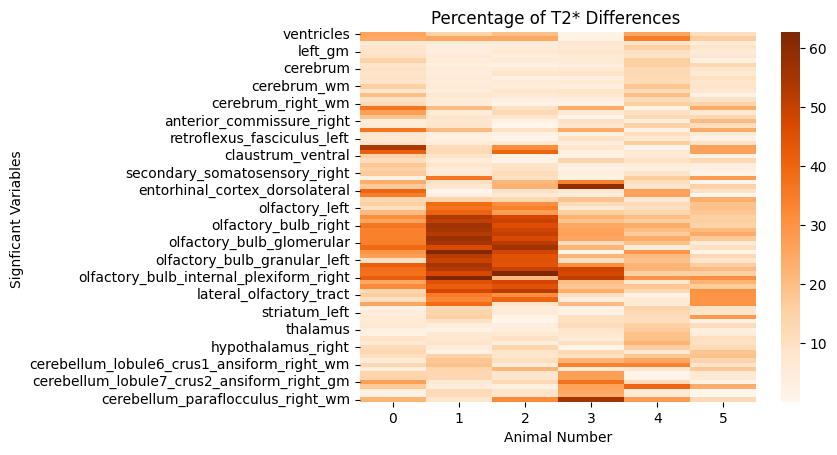

In [ ]:
#This has 85 significant variables
df_transposed = t2_animals_df .T


sns.heatmap(abs(df_transposed), cmap='Oranges')

plt.title('Percentage of T2* Differences ' )
plt.ylabel('Signficant Variables ' )
plt.xlabel('Animal Number' )
# Create the heatmap
plt.show()

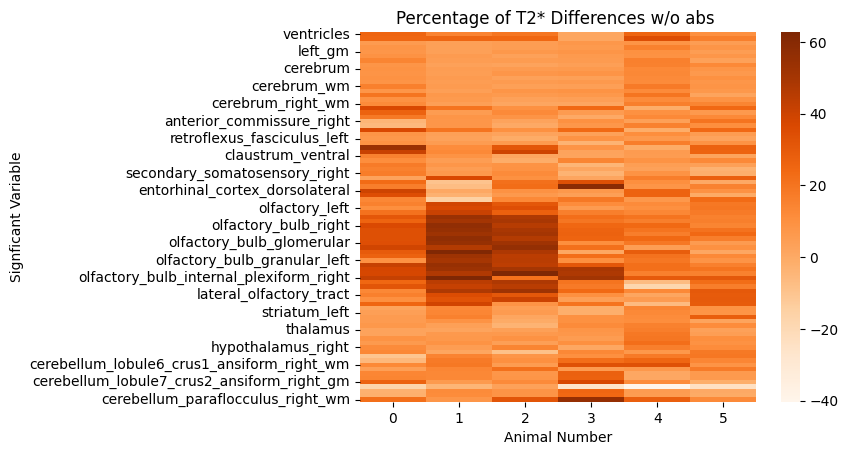

In [ ]:
df_transposed = t2_animals_df .T


sns.heatmap(df_transposed, cmap='Oranges')

plt.title('Percentage of T2* Differences w/o abs ' )
plt.ylabel('Signficant Variable' )
plt.xlabel('Animal Number' )
plt.show()

In [ ]:
#holds every variable
wb_data=pd.concat([WBI_data, WBIC_data])

wb_data


,ventricles,lateral_ventricles,lateral_ventricle_left,lateral_ventricle_right,cerebral_aqueduct,ventricle_3,ventricle_4,total_gm,total_wm,left_gm,...,cerebellum_lobule9_uvula_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_left,cerebellum_paraflocculus_right,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_wm,cerebellum_paraflocculus_left_gm,cerebellum_paraflocculus_left_wm,cerebellum_paraflocculus_right_gm,cerebellum_paraflocculus_right_wm
0,4.696036,2.931607,1.462876,1.468731,0.203963,0.962238,0.598227,369.483927,37.666851,145.465852,...,0.025373,2.896474,1.525333,1.371141,2.849631,0.046843,1.504839,0.020494,1.344792,0.026349
1,5.604670,3.858761,1.884488,1.974272,0.179568,0.906623,0.659717,382.376455,40.066116,148.537893,...,0.028301,4.001244,2.046490,1.954754,3.945617,0.055627,2.020140,0.026350,1.925477,0.029277
2,6.245962,4.227735,2.153881,2.073854,0.212753,1.106706,0.698767,398.843686,41.962127,156.416445,...,0.032206,4.058899,2.071903,1.986997,4.002295,0.056604,2.044576,0.027326,1.957719,0.029278
3,5.219866,3.281811,1.582842,1.698969,0.221520,1.000255,0.716280,387.389399,39.860884,152.769642,...,0.028300,3.676058,1.960499,1.715559,3.617507,0.058551,1.932199,0.028300,1.685307,0.030252
4,6.305021,4.428445,1.800459,2.627986,0.193220,0.989520,0.693835,375.558093,39.366124,145.577566,...,0.034155,3.267174,1.439391,1.827783,3.210574,0.056600,1.414019,0.025372,1.796555,0.031227
5,5.905768,3.860074,1.726542,2.133533,0.201056,1.141918,0.702719,386.348068,40.313622,150.149576,...,0.036112,3.144667,2.022269,1.122398,3.099772,0.044896,1.995917,0.026352,1.103854,0.018544
16,5.814351,3.820273,1.721758,2.098515,0.208875,1.069755,0.715447,413.515799,42.871198,160.056180,...,0.034162,3.460110,2.082898,1.377211,3.405451,0.054659,2.056545,0.026353,1.348906,0.028306
17,5.789405,3.887576,1.732040,2.155536,0.194184,0.996289,0.711356,418.018882,41.101558,166.752050,...,0.040983,4.121768,2.263850,1.857918,4.067123,0.054645,2.235552,0.028298,1.831572,0.026347
18,5.311185,3.424651,1.353659,2.070991,0.192265,0.954491,0.739779,400.338636,38.990658,156.334473,...,0.043918,3.385612,2.006578,1.379034,3.336814,0.048798,1.982179,0.024399,1.354635,0.024399
19,5.067258,3.426645,1.465913,1.960732,0.186411,0.825674,0.628527,411.282359,40.982133,159.842126,...,0.042943,3.284153,1.693315,1.590838,3.238282,0.045871,1.672820,0.020495,1.565463,0.025375


In [ ]:
#took all the terms, narrowed it down to 301, turned the control vs experiment into a percentage
#subtracted the control from the experimental and turned it into a percentage 
wb_a1 = (((wb_data.iloc[6] - wb_data.iloc[0])/ wb_data.iloc[6] )*100)
wb_a2 = (((wb_data.iloc[7] - wb_data.iloc[1])/ wb_data.iloc[7] )*100)
wb_a3 = (((wb_data.iloc[8] - wb_data.iloc[2])/ wb_data.iloc[8] )*100)
wb_a4 =  (((wb_data.iloc[9] - wb_data.iloc[3])/ wb_data.iloc[9] )*100)
wb_a5 =  (((wb_data.iloc[10] - wb_data.iloc[4])/ wb_data.iloc[10] )*100)
wb_a6 =  (((wb_data.iloc[11] - wb_data.iloc[5])/ wb_data.iloc[11] )*100)

wb_animals_df = pd.DataFrame([wb_a1, wb_a2, wb_a3, wb_a4, wb_a5, wb_a6])

In [ ]:
wb_animals_df = wb_animals_df[sig_col_names]
abs(wb_animals_df)

,total_gm,left_gm,right_gm,midline_gm,midline_wm,cerebrum,cerebrum_left,cerebrum_right,cerebrum_gm,cerebrum_left_gm,...,cerebellum_lobule8_copula_right,cerebellum_lobule8_copula_gm,cerebellum_lobule8_copula_left_gm,cerebellum_lobule8_copula_right_gm,cerebellum_lobule8_pyramis,cerebellum_lobule8_pyramis_gm,cerebellum_lobule8_pyramis_wm,cerebellum_lobule9_uvula,cerebellum_lobule9_uvula_gm,cerebellum_lobule9_uvula_wm
0,10.648172,9.115754,9.084770,16.018524,24.201942,8.608551,8.303887,8.910444,8.574505,8.461468,...,12.767489,12.385704,11.988730,12.748327,29.134487,28.883117,47.834238,31.143136,31.204298,25.725891
1,8.526511,10.922899,8.485679,4.127932,7.431755,8.369642,9.646982,7.043710,8.900191,10.328648,...,22.764451,17.337505,10.659366,22.867553,25.014837,25.134788,11.100558,24.040543,23.957912,30.944180
2,0.373421,0.052434,1.201428,0.358832,4.981955,0.762991,1.588506,0.070964,0.187639,0.823484,...,8.280767,4.720688,1.131212,8.032614,25.028090,24.741935,50.001560,16.786244,16.648644,26.668957
3,5.809381,4.424669,7.502602,5.221563,6.265246,4.688516,3.476473,5.900263,4.849774,3.853023,...,21.241332,24.413333,27.735535,21.301370,22.483331,22.181638,50.005938,22.171711,22.021299,34.098736
4,9.129480,9.211635,9.088193,9.058802,14.212671,8.982858,9.778027,8.189680,9.050105,9.490931,...,19.924483,16.346266,12.316603,19.939696,16.282510,15.955180,42.858570,15.391582,15.211854,27.085156
5,9.745298,9.926462,11.110400,6.973153,6.313646,8.697535,8.745955,8.650928,8.951117,8.927562,...,26.214238,24.973205,23.601533,26.171352,27.464418,27.456187,28.571426,21.248631,21.574586,15.625000


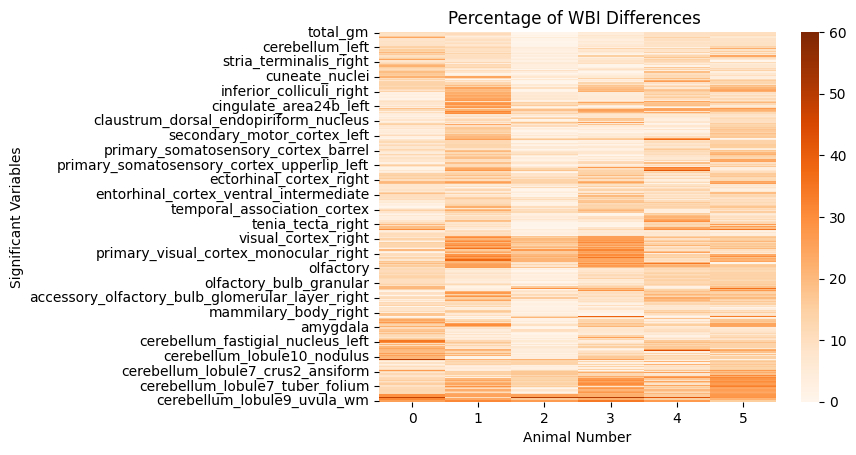

In [ ]:
#This has 301 significant variables
sns.heatmap(abs(wb_animals_df.T), vmin = 0, vmax= 60, cmap='Oranges')

plt.title('Percentage of WBI Differences ' )
plt.ylabel('Significant Variables' )
plt.xlabel('Animal Number' )
plt.show()

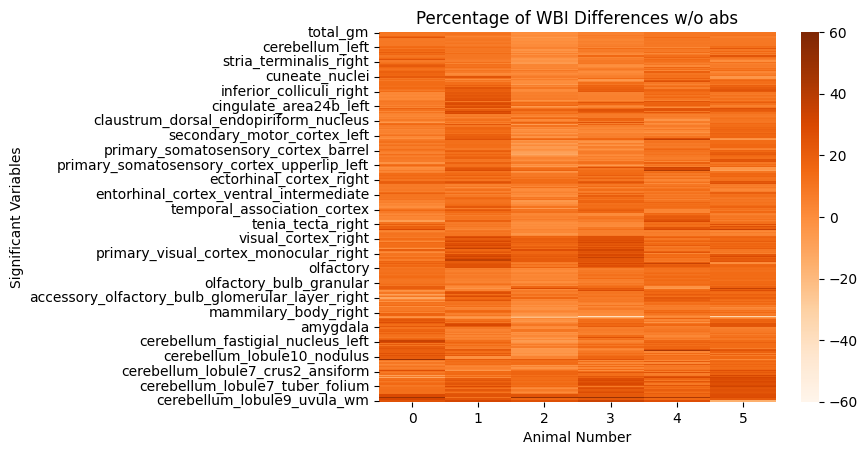

In [ ]:
sns.heatmap(wb_animals_df.T, vmin = -60, vmax= 60,cmap='Oranges')

plt.title('Percentage of WBI Differences w/o abs' )
plt.ylabel('Significant Variables' )
plt.xlabel('Animal Number' )
plt.show()

In [ ]:
#pull the in common columns 
common_wb_data=wb_data[column_names]

common_wb_a1 = (((common_wb_data.iloc[6] - common_wb_data.iloc[0])/ common_wb_data.iloc[6] )*100)
common_wb_a2 = (((common_wb_data.iloc[7] - common_wb_data.iloc[1])/ common_wb_data.iloc[7] )*100)
common_wb_a3 = (((common_wb_data.iloc[8] - common_wb_data.iloc[2])/ common_wb_data.iloc[8] )*100)
common_wb_a4 =  (((common_wb_data.iloc[9] - common_wb_data.iloc[3])/ common_wb_data.iloc[9] )*100)
common_wb_a5 =  (((common_wb_data.iloc[10] - common_wb_data.iloc[4])/ common_wb_data.iloc[10] )*100)
common_wb_a6 =  (((common_wb_data.iloc[11] - common_wb_data.iloc[5])/ common_wb_data.iloc[11] )*100)

common_wb_animals_df = pd.DataFrame([common_wb_a1, common_wb_a2, common_wb_a3, common_wb_a4, common_wb_a5, common_wb_a6])
common_wb_animals_df

,total_gm,left_gm,right_gm,cerebrum,cerebrum_left,cerebrum_right,cerebrum_gm,cerebrum_left_gm,cerebrum_right_gm,claustrum_ventral,...,lateral_olfactory_tract_right,globus_pallidus_right,hypothalamus,hypothalamus_left,mammilary_body_left,cerebellum_lobule6_simple_right_wm,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule7_crus2_ansiform_right_gm,cerebellum_lobule8_pyramis_wm
0,10.648172,9.115754,9.084770,8.608551,8.303887,8.910444,8.574505,8.461468,8.771277,8.116703,...,14.185066,-0.060353,9.027450,8.265873,11.256470,26.934495,11.506396,11.809742,7.965863,47.834238
1,8.526511,10.922899,8.485679,8.369642,9.646982,7.043710,8.900191,10.328648,7.426309,12.284666,...,7.663979,12.911736,2.856648,4.378312,16.756582,-3.858486,14.661607,14.788954,14.124906,11.100558
2,0.373421,-0.052434,1.201428,-0.762991,-1.588506,0.070964,-0.187639,-0.823484,0.549409,1.565576,...,-2.243996,1.531917,-2.189828,-2.180438,4.157298,11.541224,16.971482,17.040778,16.844704,50.001560
3,5.809381,4.424669,7.502602,4.688516,3.476473,5.900263,4.849774,3.853023,5.899023,16.430977,...,10.250310,1.542305,5.610179,7.982434,2.527299,0.011873,12.835376,12.840540,22.780706,50.005938
4,9.129480,9.211635,9.088193,8.982858,9.778027,8.189680,9.050105,9.490931,8.592738,-3.122422,...,6.380473,7.566503,5.921960,6.507633,12.807058,17.859198,6.857965,6.832687,25.283470,42.858570
5,9.745298,9.926462,11.110400,8.697535,8.745955,8.650928,8.951117,8.927562,8.964296,10.019268,...,6.734694,9.572301,1.088413,4.067140,9.265176,26.923077,18.937330,18.746292,22.771214,28.571426


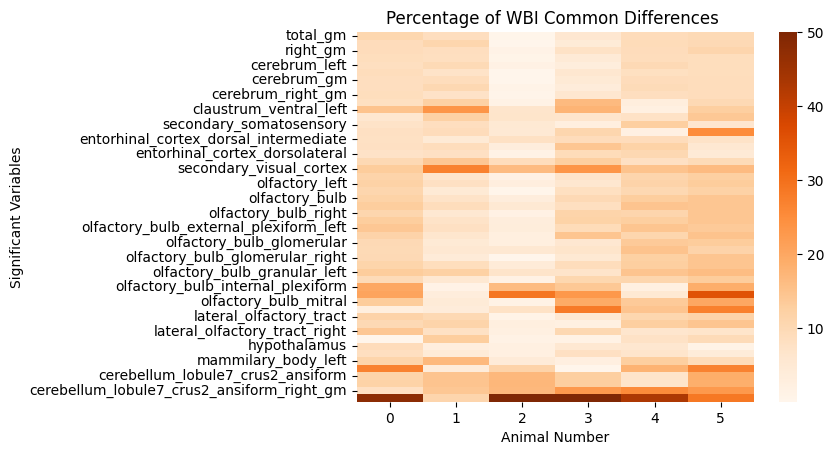

In [ ]:
#THE REST OF THESE GRAPHS HAVE THE 50 IN COMMON TEMRS
sns.heatmap(abs(common_wb_animals_df.T),cmap='Oranges')

plt.title('Percentage of WBI Common Differences ' )
plt.ylabel('Significant Variables' )
plt.xlabel('Animal Number' )
plt.show()

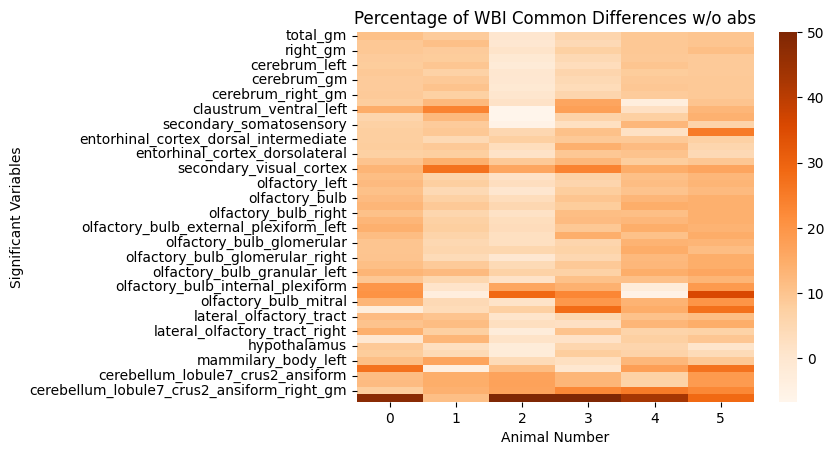

In [ ]:
sns.heatmap(common_wb_animals_df.T,cmap='Oranges')

plt.title('Percentage of WBI Common Differences w/o abs' )
plt.ylabel('Significant Variables' )
plt.xlabel('Animal Number' )
plt.show()

In [ ]:
wb_cerebrum_group =common_wb_animals_df[[ 'cerebrum_left', 'cerebrum_gm', 'cerebrum_right_gm']]
wb_cortex_group =common_wb_animals_df[['somatosensory_cortex_right', 'secondary_somatosensory', 'primary_somatosensory_cortex_jaw_right', 'entorhinal_cortex_dorsal_intermediate', 'entorhinal_cortex_dorsal_intermediate_left', 'entorhinal_cortex_dorsolateral', 'perirhinal_cortex', 'secondary_visual_cortex']]
wb_olfactory_group =common_wb_animals_df[['olfactory', 'olfactory_left', 'olfactory_right', 'olfactory_bulb', 'olfactory_bulb_left', 'olfactory_bulb_right', 'olfactory_bulb_external_plexiform', 'olfactory_bulb_external_plexiform_left', 'olfactory_bulb_external_plexiform_right', 'olfactory_bulb_glomerular', 'olfactory_bulb_glomerular_left', 'olfactory_bulb_glomerular_right', 'olfactory_bulb_granular', 'olfactory_bulb_granular_left', 'olfactory_bulb_granular_right', 'olfactory_bulb_internal_plexiform', 'olfactory_bulb_internal_plexiform_right', 'olfactory_bulb_mitral', 'olfactory_bulb_mitral_left', 'lateral_olfactory_tract', 'lateral_olfactory_tract_left', 'lateral_olfactory_tract_right' ]]
wb_hypothalamus_group = common_wb_animals_df[[ 'hypothalamus', 'hypothalamus_left']]
wb_cerebellum_group = common_wb_animals_df[[ 'cerebellum_lobule6_simple_right_wm', 'cerebellum_lobule7_crus2_ansiform', 'cerebellum_lobule7_crus2_ansiform_gm', 'cerebellum_lobule7_crus2_ansiform_right_gm', 'cerebellum_lobule8_pyramis_wm']]

#
print('this is how cerebellum variables stood out:',len(wb_cerebrum_group.columns))
print('this is how cortex variables stood out:',len(wb_cortex_group.columns))
print('this is how olfactory variables stood out:',len(wb_olfactory_group.columns))
print('this is how hypothalamus variables stood out:',len(wb_hypothalamus_group.columns))
print('this is how cerebellum variables stood out:',len(wb_cerebellum_group.columns))

this is how cerebellum variables stood out: 3
this is how cortex variables stood out: 8
this is how olfactory variables stood out: 22
this is how hypothalamus variables stood out: 2
this is how cerebellum variables stood out: 5


In [ ]:
#pull the in t2* common columns 
common_t2_data=t2_data[column_names]

common_t2_a1 = (((common_t2_data.iloc[6] - common_t2_data.iloc[0])/ common_t2_data.iloc[6] )*100)
common_t2_a2 = (((common_t2_data.iloc[7] - common_t2_data.iloc[1])/ common_t2_data.iloc[7] )*100)
common_t2_a3 = (((common_t2_data.iloc[8] - common_t2_data.iloc[2])/ common_t2_data.iloc[8] )*100)
common_t2_a4 =  (((common_t2_data.iloc[9] - common_t2_data.iloc[3])/ common_t2_data.iloc[9] )*100)
common_t2_a5 =  (((common_t2_data.iloc[10] - common_t2_data.iloc[4])/ common_t2_data.iloc[10] )*100)
common_t2_a6 =  (((common_t2_data.iloc[11] - common_t2_data.iloc[5])/ common_t2_data.iloc[11] )*100)

common_t2_animals_df = pd.DataFrame([common_t2_a1, common_t2_a2, common_t2_a3, common_t2_a4, common_t2_a5, common_t2_a6])
common_t2_animals_df

,total_gm,left_gm,right_gm,cerebrum,cerebrum_left,cerebrum_right,cerebrum_gm,cerebrum_left_gm,cerebrum_right_gm,claustrum_ventral,...,lateral_olfactory_tract_right,globus_pallidus_right,hypothalamus,hypothalamus_left,mammilary_body_left,cerebellum_lobule6_simple_right_wm,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule7_crus2_ansiform_right_gm,cerebellum_lobule8_pyramis_wm
0,5.576227,7.889768,9.411740,9.128638,8.678105,9.540339,8.647702,7.831811,9.509563,15.169161,...,25.055719,6.800216,8.952797,6.319807,13.118036,4.078121,13.608745,14.221027,26.873271,-17.112913
1,3.930369,3.941334,5.761229,5.135120,4.378667,5.898305,5.085191,4.104292,6.065058,8.885491,...,38.936693,3.583865,6.884216,8.806757,1.380058,13.680162,12.986371,13.040514,6.290023,-4.452415
2,5.102118,6.953399,3.489426,5.655211,7.960645,3.257977,5.922838,8.213173,3.530284,1.446600,...,8.518229,-3.693671,9.307141,4.308161,-8.769695,21.459640,7.857702,7.978948,12.273900,3.229911
3,7.294155,8.185833,6.058956,6.282789,8.581058,3.910247,6.525240,8.820226,4.231312,2.318547,...,20.395240,11.729708,5.481433,10.253687,12.858956,5.939286,27.222719,26.882920,37.051047,-26.290838
4,8.472305,9.777042,9.449951,12.610223,12.879396,12.351230,11.837819,11.922283,11.696488,5.519811,...,-6.356962,15.233407,19.250790,22.098413,6.877782,7.113170,0.858392,0.728502,11.431424,-40.325878
5,5.116230,4.897598,7.572385,8.177966,6.433053,9.840430,7.962976,6.815172,9.134557,2.287218,...,29.477858,11.469493,10.417350,9.333791,18.314091,17.385263,6.160881,6.178568,-1.381561,-23.999756


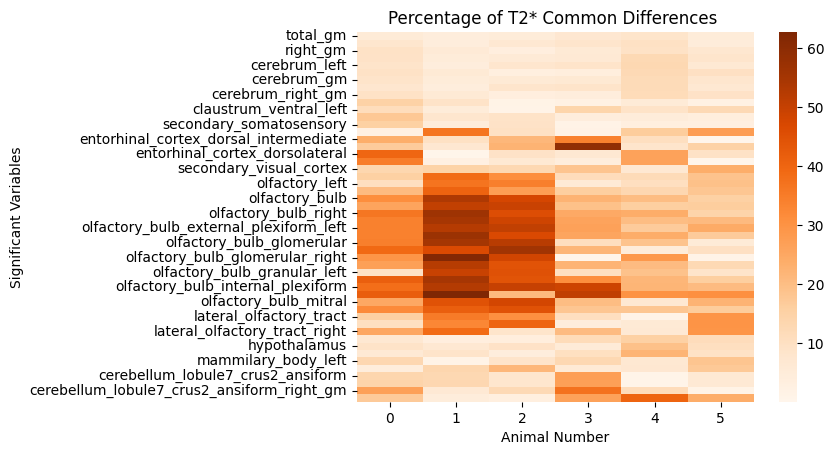

In [ ]:
#These temrs have 50
sns.heatmap(abs(common_t2_animals_df.T),cmap='Oranges')

plt.title('Percentage of T2* Common Differences ' )
plt.ylabel('Significant Variables' )
plt.xlabel('Animal Number' )
plt.show()

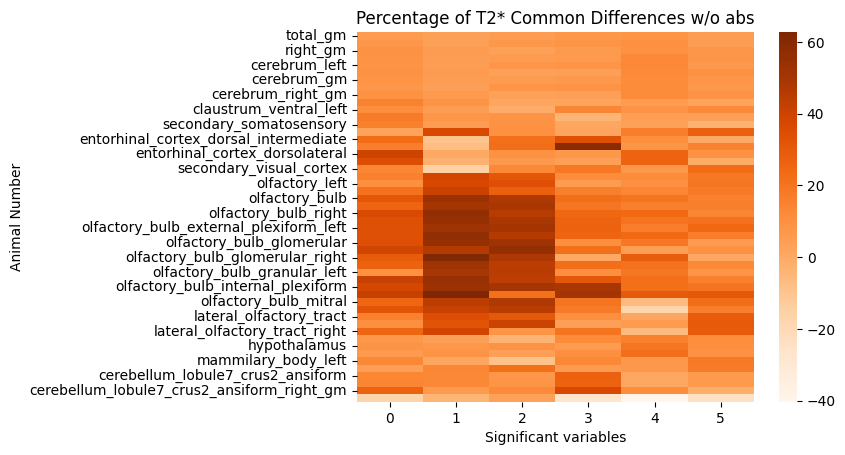

In [ ]:
sns.heatmap((common_t2_animals_df.T),cmap='Oranges')

plt.title('Percentage of T2* Common Differences w/o abs' )
plt.ylabel('Animal Number' )
plt.xlabel('Significant variables' )
plt.show()


#you just want to add a row with the z-scores

In [ ]:
#create into groups
#REMEMBER SOME GROUPS ARE LEFT OUT
t2_cerebrum_group =common_t2_animals_df[[ 'cerebrum_left', 'cerebrum_gm', 'cerebrum_right_gm']]
t2_cortex_group =common_t2_animals_df[['somatosensory_cortex_right', 'secondary_somatosensory', 'primary_somatosensory_cortex_jaw_right', 'entorhinal_cortex_dorsal_intermediate', 'entorhinal_cortex_dorsal_intermediate_left', 'entorhinal_cortex_dorsolateral', 'perirhinal_cortex', 'secondary_visual_cortex']]
t2_olfactory_group =common_t2_animals_df[['olfactory', 'olfactory_left', 'olfactory_right', 'olfactory_bulb', 'olfactory_bulb_left', 'olfactory_bulb_right', 'olfactory_bulb_external_plexiform', 'olfactory_bulb_external_plexiform_left', 'olfactory_bulb_external_plexiform_right', 'olfactory_bulb_glomerular', 'olfactory_bulb_glomerular_left', 'olfactory_bulb_glomerular_right', 'olfactory_bulb_granular', 'olfactory_bulb_granular_left', 'olfactory_bulb_granular_right', 'olfactory_bulb_internal_plexiform', 'olfactory_bulb_internal_plexiform_right', 'olfactory_bulb_mitral', 'olfactory_bulb_mitral_left', 'lateral_olfactory_tract', 'lateral_olfactory_tract_left', 'lateral_olfactory_tract_right' ]]
t2_hypothalamus_group = common_t2_animals_df[[ 'hypothalamus', 'hypothalamus_left']]
t2_cerebellum_group = common_t2_animals_df[[ 'cerebellum_lobule6_simple_right_wm', 'cerebellum_lobule7_crus2_ansiform', 'cerebellum_lobule7_crus2_ansiform_gm', 'cerebellum_lobule7_crus2_ansiform_right_gm', 'cerebellum_lobule8_pyramis_wm']]

#
print('this is how cerebrum variables stood out:',len(t2_cerebrum_group.columns))
print('this is how cortex variables stood out:',len(t2_cortex_group.columns))
print('this is how olfactory variables stood out:',len(t2_olfactory_group.columns))
print('this is how hypothalamus variables stood out:',len(t2_hypothalamus_group.columns))
print('this is how cerebellum variables stood out:',len(t2_cerebellum_group.columns))

this is how cerebrum variables stood out: 3
this is how cortex variables stood out: 8
this is how olfactory variables stood out: 22
this is how hypothalamus variables stood out: 2
this is how cerebellum variables stood out: 5


In [ ]:
#These are the names of each unique column from the total 50
#JUST THE NAMES
right_cols = [
    'right_gm',
    'cerebrum_right',
    'cerebrum_right_gm',
    'somatosensory_cortex_right',
    'primary_somatosensory_cortex_jaw_right',
    'olfactory_right',
    'olfactory_bulb_right',
    'olfactory_bulb_external_plexiform_right',
    'olfactory_bulb_glomerular_right',
    'olfactory_bulb_granular_right',
    'olfactory_bulb_internal_plexiform_right',
    'lateral_olfactory_tract_right',
    'globus_pallidus_right',
    'cerebellum_lobule6_simple_right_wm',
    'cerebellum_lobule7_crus2_ansiform_right_gm'
]

#unique to right side are 
#'somatosensory_cortex_right', 'cerebellum_lobule6_simple_right_wm', 'cerebellum_lobule7_crus2_ansiform_right_gm'

left_cols = [
    'left_gm',
    'cerebrum_left',
    'cerebrum_left_gm',
    'claustrum_ventral_left',
    'entorhinal_cortex_dorsal_intermediate_left',
    'olfactory_left',
    'olfactory_bulb_left',
    'olfactory_bulb_external_plexiform_left',
    'olfactory_bulb_glomerular_left',
    'olfactory_bulb_granular_left',
    'olfactory_bulb_mitral_left',
    'lateral_olfactory_tract_left',
    'hypothalamus_left',
    'mammilary_body_left'
]

#unique to left side are 
#'mammilary_body_left', 'hypothalamus_left',

rest_col = [
    'total_gm',
    'cerebrum',
    'cerebrum_gm',
    'claustrum_ventral',
    'secondary_somatosensory',
    'entorhinal_cortex_dorsal_intermediate',
    'entorhinal_cortex_dorsolateral',
    'perirhinal_cortex',
    'secondary_visual_cortex',
    'olfactory',
    'olfactory_bulb',
    'olfactory_bulb_external_plexiform',
    'olfactory_bulb_glomerular',
    'olfactory_bulb_granular',
    'olfactory_bulb_internal_plexiform',
    'olfactory_bulb_mitral',
    'lateral_olfactory_tract',
    'hypothalamus',
    'cerebellum_lobule7_crus2_ansiform',
    'cerebellum_lobule7_crus2_ansiform_gm',
    'cerebellum_lobule8_pyramis_wm'
]




In [ ]:
print('this is how many terms are unique to right side',len(right_cols))
print('this is how many terms are unique to left side',len(left_cols))
print('this is how many terms are unique to side',len(rest_col))

this is how many terms are unique to right side 15
this is how many terms are unique to left side 14
this is how many terms are unique to side 21


In [ ]:

common_t2_animals_df[rest_col]

,total_gm,cerebrum,cerebrum_gm,claustrum_ventral,secondary_somatosensory,entorhinal_cortex_dorsal_intermediate,entorhinal_cortex_dorsolateral,perirhinal_cortex,secondary_visual_cortex,olfactory,...,olfactory_bulb_external_plexiform,olfactory_bulb_glomerular,olfactory_bulb_granular,olfactory_bulb_internal_plexiform,olfactory_bulb_mitral,lateral_olfactory_tract,hypothalamus,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule8_pyramis_wm
0,5.576227,9.128638,8.647702,15.169161,15.470860,23.634086,39.921860,34.917878,13.317312,15.542084,...,33.946324,34.437090,26.805782,38.060247,24.841727,15.716761,8.952797,13.608745,14.221027,-17.112913
1,3.930369,5.135120,5.085191,8.885491,4.805740,-9.587000,0.359310,-2.683476,-14.922657,38.881593,...,54.827357,54.987201,52.383252,52.710593,44.584373,35.183241,6.884216,12.986371,13.040514,-4.452415
2,5.102118,5.655211,5.922838,1.446600,9.186352,21.341400,9.290318,6.394532,12.758447,31.178376,...,48.708332,52.010063,44.512641,49.884657,47.766206,30.774346,9.307141,7.857702,7.978948,3.229911
3,7.294155,6.282789,6.525240,2.318547,1.246542,33.992585,6.833067,4.223499,18.595250,11.297709,...,26.161491,10.669745,22.168193,48.759517,20.170571,10.357510,5.481433,27.222719,26.882920,-26.290838
4,8.472305,12.610223,11.837819,5.519811,3.195329,10.466778,26.447102,26.427855,6.959892,11.794164,...,20.320367,18.781805,20.488758,21.812484,-6.625387,1.143644,19.250790,0.858392,0.728502,-40.325878
5,5.116230,8.177966,7.962976,2.287218,-3.106723,0.007407,9.544973,-0.341893,23.591226,18.652991,...,20.678453,5.575578,12.511960,20.347062,22.496998,29.555095,10.417350,6.160881,6.178568,-23.999756


In [ ]:
common_wb_animals_df[rest_col]

,total_gm,cerebrum,cerebrum_gm,claustrum_ventral,secondary_somatosensory,entorhinal_cortex_dorsal_intermediate,entorhinal_cortex_dorsolateral,perirhinal_cortex,secondary_visual_cortex,olfactory,...,olfactory_bulb_external_plexiform,olfactory_bulb_glomerular,olfactory_bulb_granular,olfactory_bulb_internal_plexiform,olfactory_bulb_mitral,lateral_olfactory_tract,hypothalamus,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule8_pyramis_wm
0,10.648172,8.608551,8.574505,8.116703,7.213135,7.732727,7.287214,10.018046,13.100659,11.405509,...,12.920206,9.858781,11.243435,19.792753,13.159110,11.728300,9.027450,11.506396,11.809742,47.834238
1,8.526511,8.369642,8.900191,12.284666,8.528145,4.701576,7.895408,14.230432,26.819553,6.313855,...,7.166009,4.878680,8.733894,1.207780,4.433096,10.134256,2.856648,14.661607,14.788954,11.100558
2,0.373421,-0.762991,-0.187639,1.565576,-5.199796,7.695192,1.563913,8.951973,16.226807,1.637336,...,3.152028,2.559477,4.196542,16.329146,1.480911,0.961561,-2.189828,16.971482,17.040778,50.001560
3,5.809381,4.688516,4.849774,16.430977,2.573907,9.037830,9.360782,12.808862,23.603808,7.005246,...,11.879839,5.854802,8.937076,13.988709,19.378944,5.371372,5.610179,12.835376,12.840540,50.005938
4,9.129480,8.982858,9.050105,-3.122422,12.777752,9.042139,10.220961,7.965851,14.979747,10.971698,...,12.810428,13.658189,12.813214,-2.171359,13.490535,10.603501,5.921960,6.857965,6.832687,42.858570
5,9.745298,8.697535,8.951117,10.019268,6.216506,7.086198,4.585598,9.399571,16.406580,12.616538,...,14.304868,13.180593,14.626657,18.918918,20.089286,11.647510,1.088413,18.937330,18.746292,28.571426


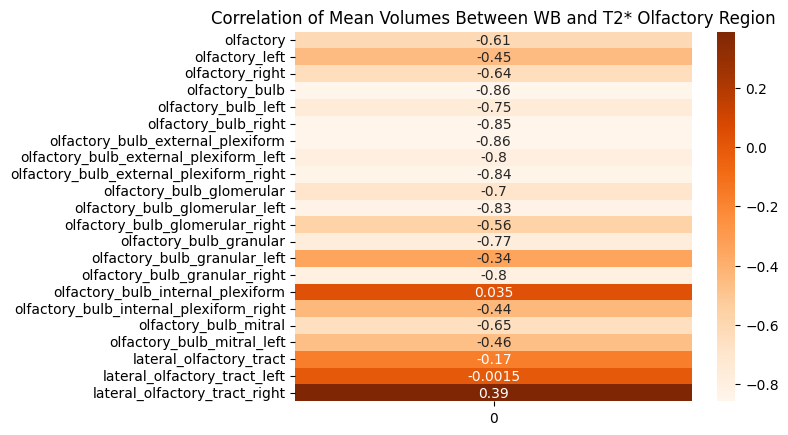

In [ ]:



correlation_series = wb_olfactory_group.corrwith(t2_olfactory_group)
plt.xlabel('')

plt.title('Correlation of Mean Volumes Between WB and T2* Olfactory Region')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='Oranges')
plt.show()

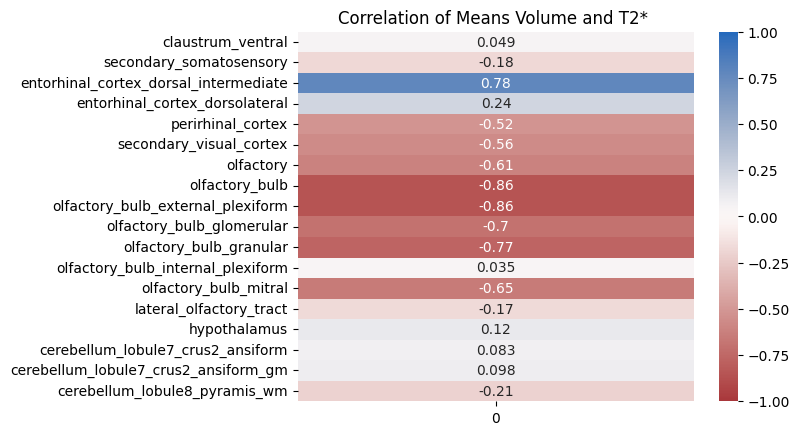

In [ ]:
# THESE ARE THE IN COMMON COLUMNS, UNIQUE FEATURED CORRELATION PLOT
#THESE ARENT THE ONLY UNIQUE VALUES, JUST THE ONES IN THE DATASET 
complete_col =[
    'total_gm',                         # Corresponding to 'left_gm' and 'right_gm'
    'cerebrum',                   # Corresponding to 'cerebrum_left' and 'cerebrum_right'
    'cerebrum_gm',                # Corresponding to 'cerebrum_left_gm' and 'cerebrum_right_gm'
    'olfactory',                  # Corresponding to 'olfactory_left' and 'olfactory_right'
    'olfactory_bulb',             # Corresponding to 'olfactory_bulb_left' and 'olfactory_bulb_right'
    'olfactory_bulb_external_plexiform',  # Corresponding to 'olfactory_bulb_external_plexiform_left' and 'olfactory_bulb_external_plexiform_right'
    'olfactory_bulb_glomerular',  # Corresponding to 'olfactory_bulb_glomerular_left' and 'olfactory_bulb_glomerular_right'
    'olfactory_bulb_granular',    # Corresponding to 'olfactory_bulb_granular_left' and 'olfactory_bulb_granular_right'
    'lateral_olfactory_tract',    # Corresponding to 'lateral_olfactory_tract_left' and 'lateral_olfactory_tract_right'
    'hypothalamus'                # Corresponding to 'hypothalamus_left' and 'hypothalamus_right'
]

rest_col = [
    'claustrum_ventral',
    'secondary_somatosensory',
    'entorhinal_cortex_dorsal_intermediate',
    'entorhinal_cortex_dorsolateral',
    'perirhinal_cortex',
    'secondary_visual_cortex',
    'olfactory',
    'olfactory_bulb',
    'olfactory_bulb_external_plexiform',
    'olfactory_bulb_glomerular',
    'olfactory_bulb_granular',
    'olfactory_bulb_internal_plexiform',
    'olfactory_bulb_mitral',
    'lateral_olfactory_tract',
    'hypothalamus',
    'cerebellum_lobule7_crus2_ansiform',
    'cerebellum_lobule7_crus2_ansiform_gm',
    'cerebellum_lobule8_pyramis_wm'
]

c_1=common_wb_animals_df[rest_col]
c_t2=common_t2_animals_df[rest_col]


correlation_series = c_1.corrwith(c_t2)
plt.xlabel('')

plt.title('Correlation of Means Volume and T2* ')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='vlag_r', vmin=-1, vmax=1)
plt.show()

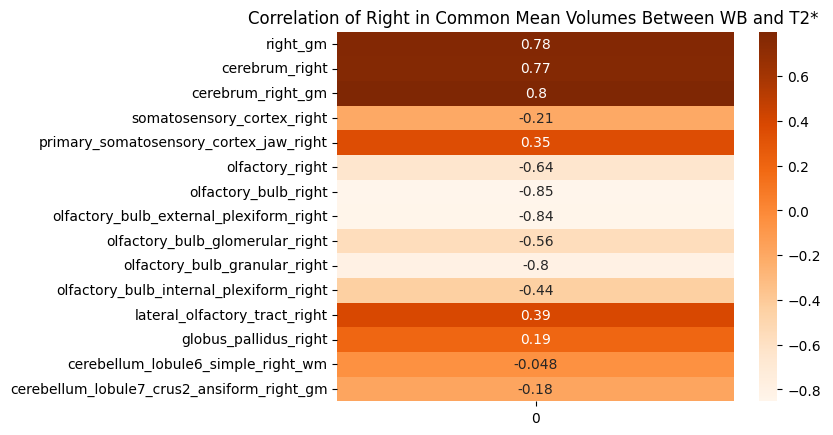

In [ ]:
c_1=common_wb_animals_df[right_cols]
c_t2=common_t2_animals_df[right_cols]


correlation_series = c_1.corrwith(c_t2)
plt.xlabel('')

plt.title('Correlation of Right in Common Mean Volumes Between WB and T2* ')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='Oranges')
plt.show()

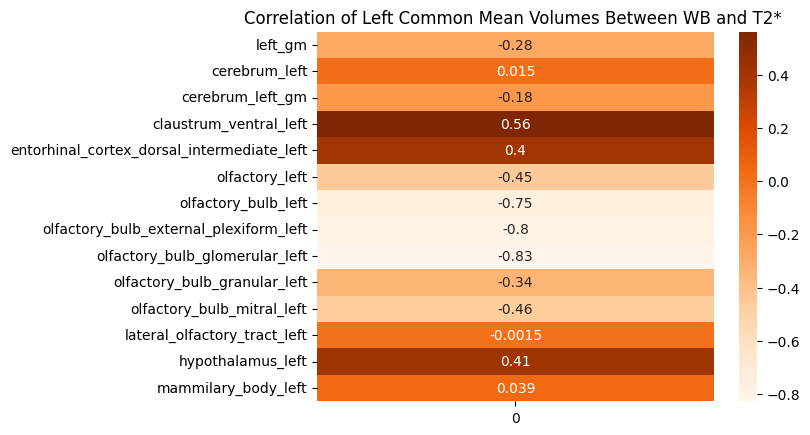

In [ ]:
c_1=common_wb_animals_df[left_cols]
c_t2=common_t2_animals_df[left_cols]


correlation_series = c_1.corrwith(c_t2)
plt.xlabel('')

plt.title('Correlation of Left Common Mean Volumes Between WB and T2* ')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='Oranges')
plt.show()

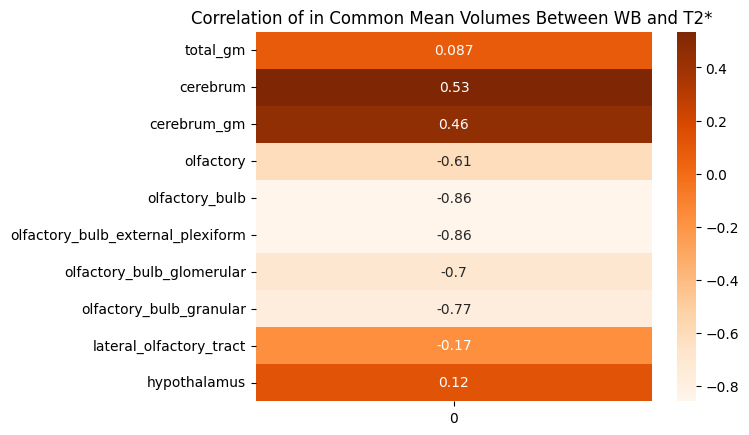

In [ ]:
complete_col =[
    'total_gm',                         # Corresponding to 'left_gm' and 'right_gm'
    'cerebrum',                   # Corresponding to 'cerebrum_left' and 'cerebrum_right'
    'cerebrum_gm',                # Corresponding to 'cerebrum_left_gm' and 'cerebrum_right_gm'
    'olfactory',                  # Corresponding to 'olfactory_left' and 'olfactory_right'
    'olfactory_bulb',             # Corresponding to 'olfactory_bulb_left' and 'olfactory_bulb_right'
    'olfactory_bulb_external_plexiform',  # Corresponding to 'olfactory_bulb_external_plexiform_left' and 'olfactory_bulb_external_plexiform_right'
    'olfactory_bulb_glomerular',  # Corresponding to 'olfactory_bulb_glomerular_left' and 'olfactory_bulb_glomerular_right'
    'olfactory_bulb_granular',    # Corresponding to 'olfactory_bulb_granular_left' and 'olfactory_bulb_granular_right'
    'lateral_olfactory_tract',    # Corresponding to 'lateral_olfactory_tract_left' and 'lateral_olfactory_tract_right'
    'hypothalamus'                # Corresponding to 'hypothalamus_left' and 'hypothalamus_right'
]


#I would make this heatmap because there are groups that are unique to the right & left side
#I broke it down even further so these 10 groups can be representitive of the overall changes
c_1=common_wb_animals_df[complete_col]
c_t2=common_t2_animals_df[complete_col]


correlation_series = c_1.corrwith(c_t2)
plt.xlabel('')

plt.title('Correlation of in Common Mean Volumes Between WB and T2* ')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='Oranges')
plt.show()

In [ ]:
#make the means of the olfactory groups & plot it on X & Y
means_common_wb=common_wb_animals_df.describe()
means_common_wb = means_common_wb.iloc[1]


means_common_t2=common_t2_animals_df.describe()
means_common_t2 = means_common_t2.iloc[1]


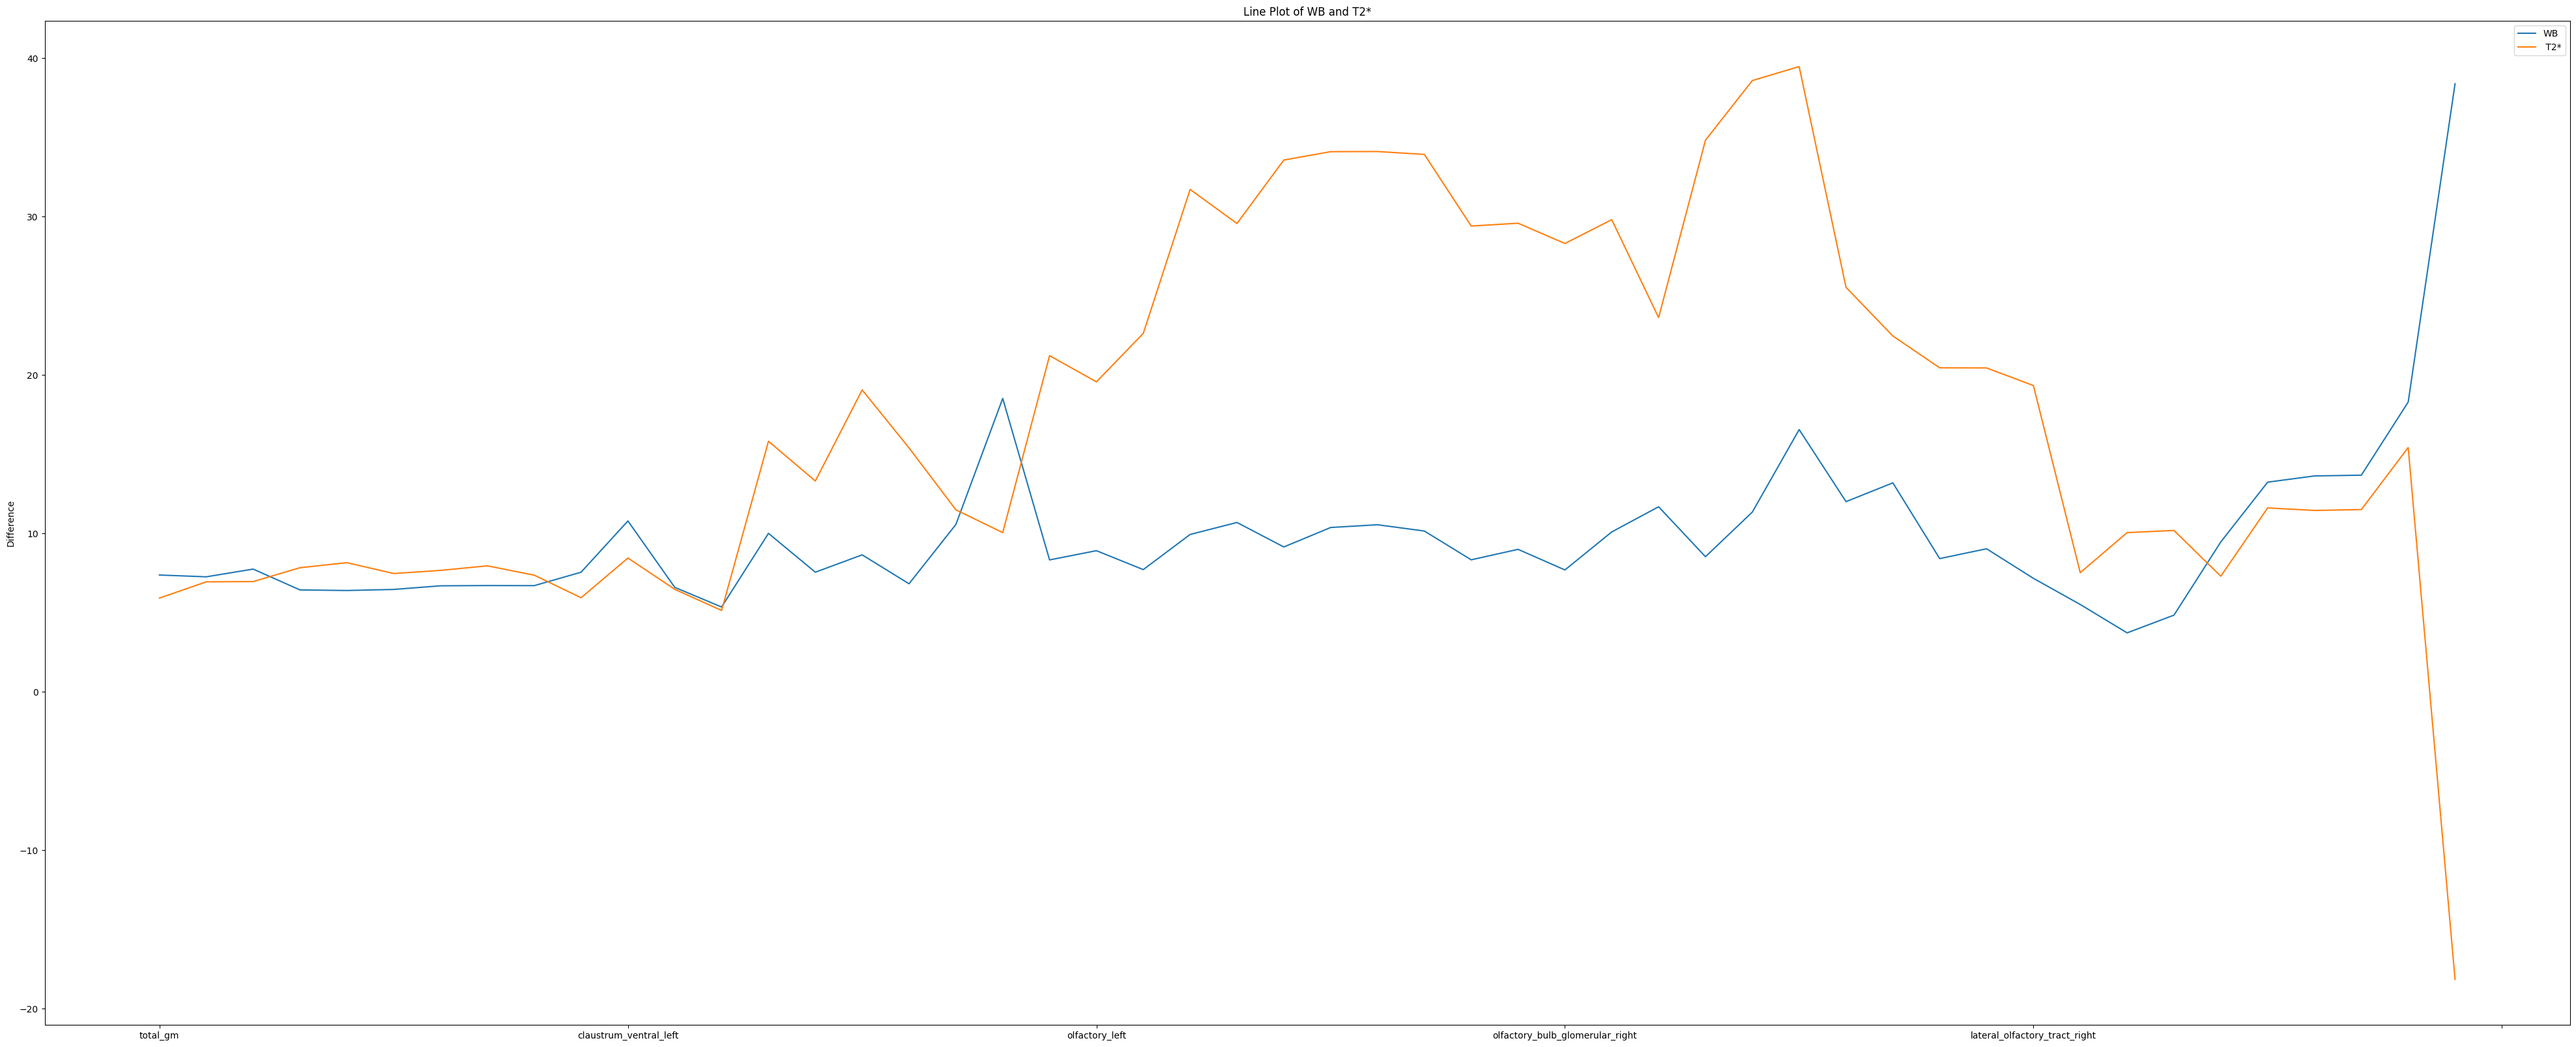

In [ ]:

plt.figure(figsize=(50, 20))
means_common_wb.plot(x='x', y='y', label="WB")
means_common_t2.plot(x='x', y='y', label=" T2*", ax=plt.gca())



plt.xlabel('')
plt.ylabel('Difference')
plt.title('Line Plot of WB and T2*')
plt.legend()
plt.show()


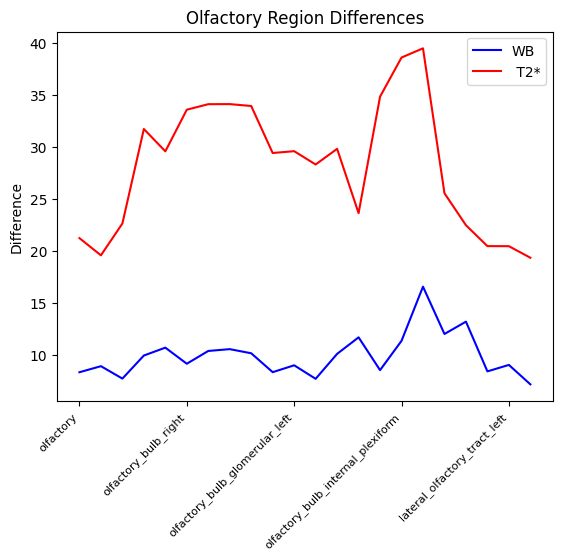

In [ ]:
means_olfactory_wb=wb_olfactory_group.describe()
means_olfactory_wb = means_olfactory_wb.iloc[1]
means_olfactory_wb


means_olfactory_t2=t2_olfactory_group.describe()
means_olfactory_t2 = means_olfactory_t2.iloc[1]
means_olfactory_t2

means_olfactory_wb.plot(x='x', y='y', label="WB", color = 'blue')
means_olfactory_t2.plot(x='x', y='y', label=" T2*",color = 'red', ax=plt.gca())


plt.xticks(rotation=45, ha='right', fontsize=8)



plt.xlabel('')
plt.ylabel('Difference')
plt.title('Olfactory Region Differences')
plt.legend()
plt.show()

#means_common_t2=common_t2_animals_df.describe()
#means_common_t2 = means_common_t2.iloc[1]


In [ ]:
#clean up the data frame, so make left_gm and right_gm just under gm 

#   FOR THE Z-SCORES !!!!!!!!!!!!

#take wbi/c df and get the standard devs across the board
#use this standard dev to calculate the z-scores 
import statistics

#this step describes how we take the data and narrow down all the stds
std_wb = wb_animals_df.describe()
avg_std_wb=std_wb.iloc[2]
avg_std_wb 

#average them
average_std_wb = statistics.mean(avg_std_wb )
print(average_std_wb )  



std_t2 = t2_animals_df.describe()
avg_std_t2=std_t2.iloc[2]
avg_std_t2

#average them
average_std_t2 = statistics.mean(avg_std_t2 )
print(average_std_t2 )  



7.1023719532632255
10.64976263998984


In [ ]:
#Now I need to make a WBI z-score and T2* z-score

wb_a1 = (((wb_data.iloc[0] - wb_data.iloc[6])/ average_std_wb  ))
wb_a2 = (((wb_data.iloc[1] - wb_data.iloc[7])/ average_std_wb ))
wb_a3 = (((wb_data.iloc[2] - wb_data.iloc[8])/ average_std_wb  ))
wb_a4 =  (((wb_data.iloc[3] - wb_data.iloc[9])/ average_std_wb  ))
wb_a5 =  (((wb_data.iloc[4] - wb_data.iloc[10])/ average_std_wb  ))
wb_a6 =  (((wb_data.iloc[5] - wb_data.iloc[11])/ average_std_wb  ))

#z-score signficiant table 
#significance comes from p values
wb_zscore_df = pd.DataFrame([wb_a1, wb_a2, wb_a3, wb_a4, wb_a5, wb_a6])
wb_zscore_df =wb_zscore_df[sig_col_names]
wb_zscore_df

,total_gm,left_gm,right_gm,midline_gm,midline_wm,cerebrum,cerebrum_left,cerebrum_right,cerebrum_gm,cerebrum_left_gm,...,cerebellum_lobule8_copula_right,cerebellum_lobule8_copula_gm,cerebellum_lobule8_copula_left_gm,cerebellum_lobule8_copula_right_gm,cerebellum_lobule8_pyramis,cerebellum_lobule8_pyramis_gm,cerebellum_lobule8_pyramis_wm,cerebellum_lobule9_uvula,cerebellum_lobule9_uvula_gm,cerebellum_lobule9_uvula_wm
0,-6.199601,-2.054290,-2.058568,-2.086743,-0.217653,-3.659552,-1.755353,-1.902822,-3.321771,-1.624240,...,-0.021599,-0.039898,-0.018436,-0.021461,-0.069427,-0.067915,-0.001512,-0.134175,-0.132937,-0.001237
1,-5.018384,-2.564518,-1.934589,-0.519277,-0.064204,-3.588093,-2.102207,-1.483552,-3.487536,-2.052694,...,-0.046007,-0.063576,-0.017706,-0.045870,-0.072379,-0.072104,-0.000275,-0.117287,-0.115502,-0.001786
2,-0.210486,0.011542,-0.265891,0.043864,0.039412,0.313931,0.325158,-0.014661,0.070688,0.154138,...,-0.015396,-0.016775,-0.001929,-0.014846,-0.066789,-0.065278,-0.001512,-0.075589,-0.073940,-0.001649
3,-3.364082,-0.995792,-1.709475,-0.658815,-0.052311,-1.977507,-0.731400,-1.246381,-1.867978,-0.738597,...,-0.044542,-0.098563,-0.054158,-0.044405,-0.062687,-0.061175,-0.001512,-0.107641,-0.105579,-0.002062
4,-5.312473,-2.079685,-2.047945,-1.184843,-0.129865,-3.829137,-2.095320,-1.734779,-3.511238,-1.839569,...,-0.035316,-0.054556,-0.019377,-0.035179,-0.038615,-0.037378,-0.001237,-0.067062,-0.065275,-0.001786
5,-5.873549,-2.329796,-2.625384,-0.918369,-0.055380,-3.809521,-1.916578,-1.891843,-3.576459,-1.779984,...,-0.054143,-0.096056,-0.042325,-0.053731,-0.071595,-0.071045,-0.000550,-0.106637,-0.107324,0.000687


In [ ]:
wb_a1 = (((t2_data.iloc[0] - t2_data.iloc[6])/ average_std_t2  ))
wb_a2 = (((t2_data.iloc[1] - t2_data.iloc[7])/ average_std_t2 ))
wb_a3 = (((t2_data.iloc[2] - t2_data.iloc[8])/ average_std_t2  ))
wb_a4 =  (((t2_data.iloc[3] - t2_data.iloc[9])/ average_std_t2  ))
wb_a5 =  (((t2_data.iloc[4] - t2_data.iloc[10])/ average_std_t2  ))
wb_a6 =  (((t2_data.iloc[5] - t2_data.iloc[11])/ average_std_t2  ))

#z-score signficiant table, from the p values 
t2_zscore_df = pd.DataFrame([wb_a1, wb_a2, wb_a3, wb_a4, wb_a5, wb_a6])
t2_zscore_df = t2_zscore_df[t2_sig_col]
t2_zscore_df

,ventricles,lateral_ventricle_right,total_gm,total_wm,left_gm,right_gm,left_wm,right_wm,cerebrum,cerebrum_left,...,cerebellum_lobule6_crus1_ansiform_wm,cerebellum_lobule6_crus1_ansiform_right_wm,cerebellum_lobule6_simple_right_wm,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule7_crus2_ansiform_right_gm,cerebellum_lobule8_pyramis_wm,cerebellum_paraflocculus,cerebellum_paraflocculus_gm,cerebellum_paraflocculus_right_wm
0,-2.959498,-3.034520,-0.191316,-0.316651,-0.278342,-0.334584,-0.585592,-0.315626,-0.339494,-0.322948,...,0.184436,-0.460595,-0.156701,-0.373515,-0.388908,-0.718198,0.495042,0.040940,0.032123,-0.797721
1,-1.399007,-2.462990,-0.133204,-0.132854,-0.137478,-0.198304,-0.178246,-0.113171,-0.182230,-0.156689,...,-0.581846,-0.574939,-0.465415,-0.384895,-0.385089,-0.172169,0.150407,-0.173594,-0.163516,-0.253765
2,-2.268377,-3.412977,-0.175415,-0.175269,-0.246184,-0.118998,-0.204965,-0.098635,-0.203526,-0.293474,...,-0.370491,-0.191417,-0.882845,-0.225682,-0.228040,-0.375621,-0.103278,-0.131752,-0.129978,-1.292026
3,-0.107377,-0.110978,-0.249070,-0.221093,-0.284803,-0.210907,-0.212285,-0.144733,-0.224722,-0.310430,...,-0.905372,-1.656154,-0.226322,-0.911915,-0.892046,-1.434127,0.716878,-0.424267,-0.399027,-3.416024
4,-2.377353,-3.654586,-0.299928,-0.585709,-0.353072,-0.342638,-0.609869,-0.603530,-0.478246,-0.487829,...,-1.027355,-1.492995,-0.296202,-0.024115,-0.020256,-0.319437,1.177289,-0.085040,-0.079810,-0.909027
5,-0.843196,-1.487597,-0.176497,-0.296786,-0.170482,-0.270730,-0.120033,-0.479349,-0.300592,-0.232767,...,-0.516076,-0.333483,-0.742381,-0.173126,-0.172231,0.038926,0.762917,-0.003452,0.004333,-0.378744


In [ ]:
rest_col


['total_gm',
 'cerebrum',
 'cerebrum_gm',
 'claustrum_ventral',
 'secondary_somatosensory',
 'entorhinal_cortex_dorsal_intermediate',
 'entorhinal_cortex_dorsolateral',
 'perirhinal_cortex',
 'secondary_visual_cortex',
 'olfactory',
 'olfactory_bulb',
 'olfactory_bulb_external_plexiform',
 'olfactory_bulb_glomerular',
 'olfactory_bulb_granular',
 'olfactory_bulb_internal_plexiform',
 'olfactory_bulb_mitral',
 'lateral_olfactory_tract',
 'hypothalamus',
 'cerebellum_lobule7_crus2_ansiform',
 'cerebellum_lobule7_crus2_ansiform_gm',
 'cerebellum_lobule8_pyramis_wm']

In [ ]:
#all the z-scores in dfs 
wb_z= wb_zscore_df[rest_col].iloc[:,3:]
t2_z = t2_zscore_df[rest_col].iloc[:,3:]

print(wb_z)

   claustrum_ventral  secondary_somatosensory  \
0          -0.005231                -0.069816   
1          -0.008236                -0.082604   
2          -0.000964                 0.048202   
3          -0.010725                -0.025675   
4           0.001922                -0.128218   
5          -0.007146                -0.063762   

   entorhinal_cortex_dorsal_intermediate  entorhinal_cortex_dorsolateral  \
0                              -0.018863                       -0.028091   
1                              -0.011924                       -0.031968   
2                              -0.019245                       -0.006058   
3                              -0.022976                       -0.037007   
4                              -0.022127                       -0.039168   
5                              -0.018414                       -0.018552   

   perirhinal_cortex  secondary_visual_cortex  olfactory  olfactory_bulb  \
0          -0.034543                -0.107717  

In [ ]:
#wb_zscore_df = wb_zscore_df[rest_col].iloc[:,3:]

In [ ]:
#t2_zscore_df=t2_zscore_df[rest_col].iloc[:,3:]

In [ ]:
wb_zscore_df.to_excel("WBI Z-scores.xlsx", index=False)
t2_zscore_df.to_excel("T2 Z-scores.xlsx", index=False)

#rank them for 
print("DataFrame saved as 'dataframe.xlsx'!")

DataFrame saved as 'dataframe.xlsx'!


In [ ]:
wb_zscore_df.describe()

,total_gm,left_gm,right_gm,midline_gm,midline_wm,cerebrum,cerebrum_left,cerebrum_right,cerebrum_gm,cerebrum_left_gm,...,cerebellum_lobule8_copula_right,cerebellum_lobule8_copula_gm,cerebellum_lobule8_copula_left_gm,cerebellum_lobule8_copula_right_gm,cerebellum_lobule8_pyramis,cerebellum_lobule8_pyramis_gm,cerebellum_lobule8_pyramis_wm,cerebellum_lobule9_uvula,cerebellum_lobule9_uvula_gm,cerebellum_lobule9_uvula_wm
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,-4.329762,-1.668756,-1.773642,-0.887364,-0.080000,-2.758313,-1.379283,-1.379006,-2.615716,-1.313491,...,-0.036167,-0.061570,-0.025655,-0.035915,-0.063582,-0.062483,-0.001099,-0.101398,-0.100093,-0.001306
std,2.245906,0.983173,0.798151,0.718731,0.086390,1.661373,0.978807,0.714691,1.466932,0.851093,...,0.015063,0.031897,0.019016,0.015112,0.012729,0.012924,0.000550,0.025449,0.025670,0.001013
min,-6.199601,-2.564518,-2.625384,-2.086743,-0.217653,-3.829137,-2.102207,-1.902822,-3.576459,-2.052694,...,-0.054143,-0.098563,-0.054158,-0.053731,-0.072379,-0.072104,-0.001512,-0.134175,-0.132937,-0.002062
25%,-5.733280,-2.267269,-2.055913,-1.118225,-0.113450,-3.772029,-2.050634,-1.852577,-3.505312,-1.824673,...,-0.045641,-0.087936,-0.036588,-0.045504,-0.071053,-0.070263,-0.001512,-0.114876,-0.113457,-0.001786
50%,-5.165428,-2.066987,-1.991267,-0.788592,-0.059792,-3.623822,-1.835966,-1.609165,-3.404654,-1.702112,...,-0.039929,-0.059066,-0.018907,-0.039792,-0.068108,-0.066596,-0.001374,-0.107139,-0.106452,-0.001717
75%,-3.777657,-1.260416,-1.765754,-0.554162,-0.053078,-2.380154,-0.987388,-1.305674,-2.231426,-0.960008,...,-0.025028,-0.043562,-0.017888,-0.024891,-0.063713,-0.062201,-0.000721,-0.083351,-0.081850,-0.001340
max,-0.210486,0.011542,-0.265891,0.043864,0.039412,0.313931,0.325158,-0.014661,0.070688,0.154138,...,-0.015396,-0.016775,-0.001929,-0.014846,-0.038615,-0.037378,-0.000275,-0.067062,-0.065275,0.000687


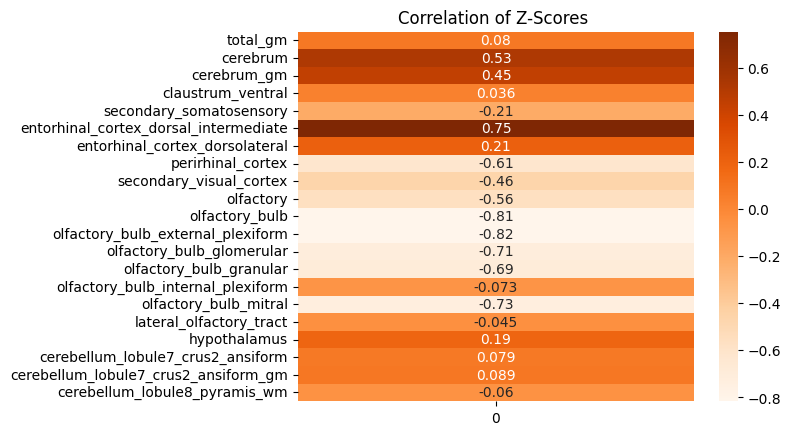

In [ ]:
#Make a correlation plot between these two varaibles 
#X,Y plot of the differences
correlation_series = wb_z.corrwith(t2_z)
plt.xlabel('')

plt.title('Correlation of Z-Scores ')

# Create a heatmap
sns.heatmap(correlation_series.to_frame(), annot=True, cmap='Oranges')
plt.show()


In [ ]:
#this is taking the means of the z-scores from each feature

wb_z = wb_z.describe()
wb_z_df = wb_z.iloc[1]
wb_z_df


t2_z=t2_z.describe()
t2_z_df = t2_z.iloc[1]
t2_z_df

total_gm                                 2.001260
cerebrum                                 1.954251
cerebrum_gm                              1.959643
claustrum_ventral                        1.949167
secondary_somatosensory                  2.004399
entorhinal_cortex_dorsal_intermediate    1.856699
entorhinal_cortex_dorsolateral           1.816782
perirhinal_cortex                        1.870617
secondary_visual_cortex                  1.977886
olfactory                                1.786091
olfactory_bulb                           1.662529
olfactory_bulb_external_plexiform        1.663405
olfactory_bulb_glomerular                1.778245
olfactory_bulb_granular                  1.607846
olfactory_bulb_internal_plexiform        1.596023
olfactory_bulb_mitral                    1.814091
lateral_olfactory_tract                  1.814042
hypothalamus                             1.847050
cerebellum_lobule7_crus2_ansiform        1.913381
cerebellum_lobule7_crus2_ansiform_gm     1.915464


In [ ]:
column_names = [
    "total_gm",
    "cerebrum",
    "cerebrum_gm",
    "claustrum_ventral",
    "secondary_somatosensory",
    "entorhinal_cortex_dorsal_intermediate",
    "entorhinal_cortex_dorsolateral",
    "perirhinal_cortex",
    "secondary_visual_cortex",
    "olfactory",
    "olfactory_bulb",
    "olfactory_bulb_external_plexiform",
    "olfactory_bulb_glomerular",
    "olfactory_bulb_granular",
    "olfactory_bulb_internal_plexiform",
    "olfactory_bulb_mitral",
    "lateral_olfactory_tract",
    "hypothalamus",
    "cerebellum_lobule7_crus2_ansiform",
    "cerebellum_lobule7_crus2_ansiform_gm",
    "cerebellum_lobule8_pyramis_wm"
]

print(column_names)

['total_gm', 'cerebrum', 'cerebrum_gm', 'claustrum_ventral', 'secondary_somatosensory', 'entorhinal_cortex_dorsal_intermediate', 'entorhinal_cortex_dorsolateral', 'perirhinal_cortex', 'secondary_visual_cortex', 'olfactory', 'olfactory_bulb', 'olfactory_bulb_external_plexiform', 'olfactory_bulb_glomerular', 'olfactory_bulb_granular', 'olfactory_bulb_internal_plexiform', 'olfactory_bulb_mitral', 'lateral_olfactory_tract', 'hypothalamus', 'cerebellum_lobule7_crus2_ansiform', 'cerebellum_lobule7_crus2_ansiform_gm', 'cerebellum_lobule8_pyramis_wm']


In [ ]:
#subtracted control from experimental, took the means of each cell 
#I took out the first 3 because they had the data skwed 

t2_z_df = t2_z.describe().iloc[1]
t2_z_df = t2_z_df.iloc[3:]
t2_z_df = pd.DataFrame(t2_z_df)
t2_z_df


,mean
claustrum_ventral,0.562599
secondary_somatosensory,0.630395
entorhinal_cortex_dorsal_intermediate,0.437094
entorhinal_cortex_dorsolateral,0.396782
perirhinal_cortex,0.477871
secondary_visual_cortex,0.581457
olfactory,0.331809
olfactory_bulb,0.160662
olfactory_bulb_external_plexiform,0.157507
olfactory_bulb_glomerular,0.310148


In [ ]:
wb_z_df = wb_z.describe().iloc[1]
wb_z_df = wb_z_df[3:]
wb_z_df = pd.DataFrame(wb_z_df)

wb_z_df

,mean
claustrum_ventral,0.746836
secondary_somatosensory,0.718101
entorhinal_cortex_dorsal_intermediate,0.736386
entorhinal_cortex_dorsolateral,0.731722
perirhinal_cortex,0.721840
secondary_visual_cortex,0.626076
olfactory,0.514295
olfactory_bulb,0.557058
olfactory_bulb_external_plexiform,0.657570
olfactory_bulb_glomerular,0.721156


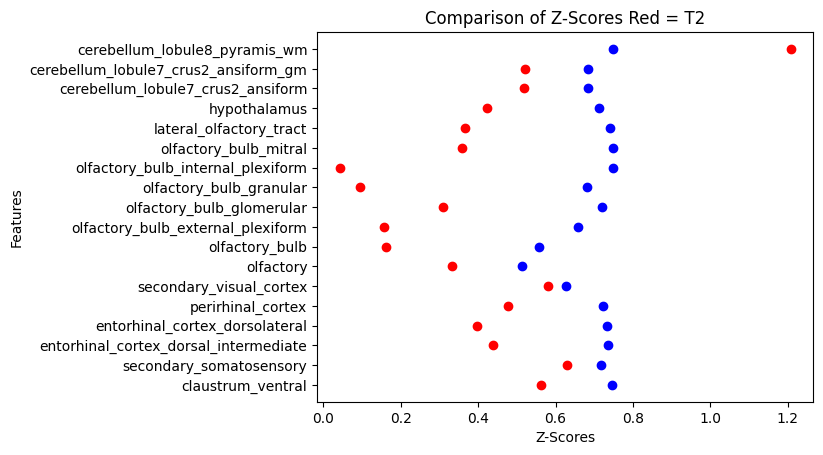

In [ ]:
#use the coloumn name as the 'y' or the index
col_name = column_names[3:]
plt.scatter(wb_z_df, col_name, color = 'blue', label = "WB")
plt.scatter(t2_z_df, col_name, color = 'red', label = "T2")

plt.xlabel('Z-Scores')
plt.ylabel('Features')
plt.title('Comparison of Z-Scores Red = T2')
plt.show()

/var/folders/1c/61jms4g902v0xdx5_kl0kppw0000gn/T/ipykernel_743/424614514.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('vlag_r')


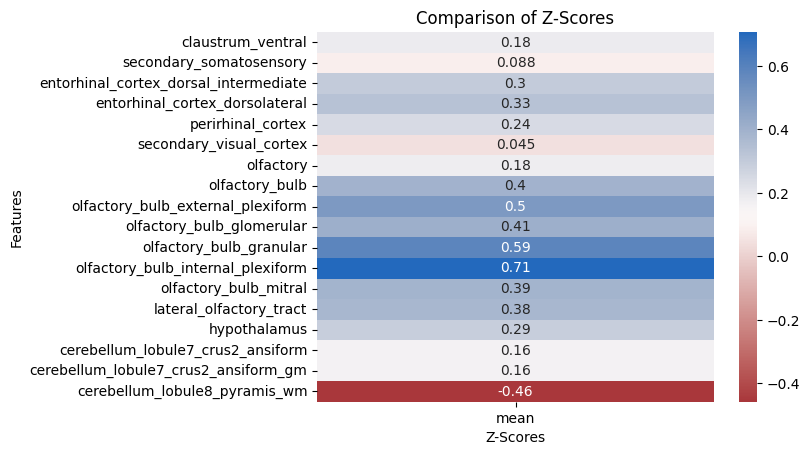

In [ ]:
#this is what I should do 

#make a heatmap of the all the z-scores, add a column where its wb - t2* volumes 
#show the differences in z-score with heatmap
#divide the different sections by color 


#I'm going to drop the top 3 because they're skewing the data
df_differences = wb_z_df - t2_z_df
cmap = plt.cm.get_cmap('vlag_r')

# Create a heatmap
sns.heatmap(df_differences , cmap=cmap, annot=True)


plt.xlabel('Z-Scores')
plt.ylabel('Features')
plt.title('Comparison of Z-Scores')
plt.show()



/var/folders/1c/61jms4g902v0xdx5_kl0kppw0000gn/T/ipykernel_743/2334222618.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('vlag_r')


<Axes: >

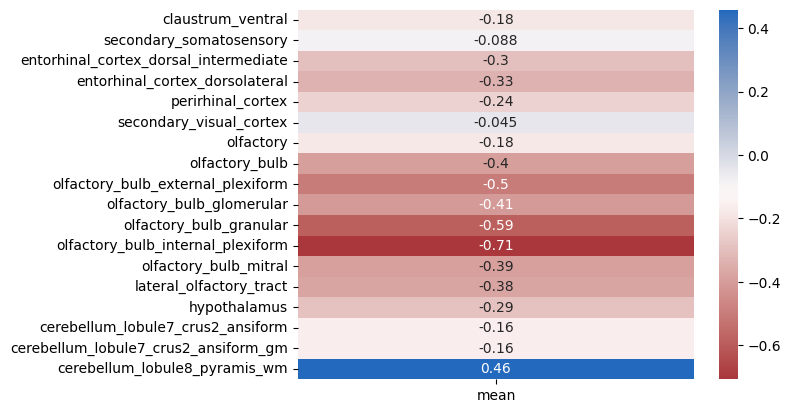

In [ ]:
#I'm going to drop the top 3 because they're skewing the data

wb_z_df = pd.DataFrame(wb_z_df)
t2_z_df = pd.DataFrame(t2_z_df)

df_differences = t2_z_df - wb_z_df
# Create a heatmap
cmap = plt.cm.get_cmap('vlag_r')
sns.heatmap(df_differences , cmap = cmap, annot=True)

/var/folders/1c/61jms4g902v0xdx5_kl0kppw0000gn/T/ipykernel_4006/449214884.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis_r')  # Reverse the viridis colormap


<Axes: >

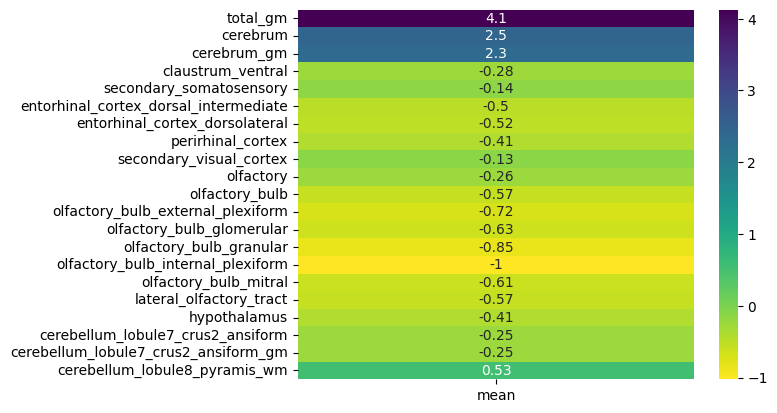

In [ ]:
cmap = plt.cm.get_cmap('viridis_r')  # Reverse the viridis colormap

# Create a heatmap with the custom colormap
sns.heatmap(df_differences, cmap=cmap, annot=True)

In [ ]:
wb_z_df = pd.DataFrame(wb_z_df)
t2_z_df = pd.DataFrame(t2_z_df)

df_differences = t2_z_df - wb_z_df

In [ ]:
wb_z_df = pd.DataFrame(wb_z_df)
wb_z_df.shape

t2_z_df = pd.DataFrame(t2_z_df)
t2_z_df 

,mean
claustrum_ventral,0.562599
secondary_somatosensory,0.630395
entorhinal_cortex_dorsal_intermediate,0.437094
entorhinal_cortex_dorsolateral,0.396782
perirhinal_cortex,0.477871
secondary_visual_cortex,0.581457
olfactory,0.331809
olfactory_bulb,0.160662
olfactory_bulb_external_plexiform,0.157507
olfactory_bulb_glomerular,0.310148


In [ ]:
wxyz =wb_zscore_df[rest_col]

wxyz.describe()



,total_gm,cerebrum,cerebrum_gm,claustrum_ventral,secondary_somatosensory,entorhinal_cortex_dorsal_intermediate,entorhinal_cortex_dorsolateral,perirhinal_cortex,secondary_visual_cortex,olfactory,...,olfactory_bulb_external_plexiform,olfactory_bulb_glomerular,olfactory_bulb_granular,olfactory_bulb_internal_plexiform,olfactory_bulb_mitral,lateral_olfactory_tract,hypothalamus,cerebellum_lobule7_crus2_ansiform,cerebellum_lobule7_crus2_ansiform_gm,cerebellum_lobule8_pyramis_wm
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,-4.329762,-2.758313,-2.615716,-0.005063,-0.053645,-0.018925,-0.026807,-0.039058,-0.174605,-0.347630,...,-0.134638,-0.042500,-0.096838,-0.001535,-0.003574,-0.014640,-0.060652,-0.095064,-0.093918,-0.001099
std,2.245906,1.661373,1.466932,0.004735,0.059864,0.003900,0.012520,0.010382,0.061620,0.178306,...,0.058582,0.023578,0.036945,0.001300,0.002394,0.007753,0.064442,0.033083,0.032232,0.000550
min,-6.199601,-3.829137,-3.576459,-0.010725,-0.128218,-0.022976,-0.039168,-0.055741,-0.263017,-0.541155,...,-0.190600,-0.069399,-0.144015,-0.002886,-0.006184,-0.020888,-0.148104,-0.133708,-0.130273,-0.001512
25%,-5.733280,-3.772029,-3.505312,-0.007964,-0.079407,-0.021407,-0.035747,-0.044414,-0.217529,-0.476041,...,-0.168722,-0.063266,-0.120041,-0.002406,-0.005430,-0.020186,-0.094712,-0.118098,-0.116896,-0.001512
50%,-5.165428,-3.623822,-3.404654,-0.006189,-0.066789,-0.019054,-0.030029,-0.035342,-0.155773,-0.371272,...,-0.160782,-0.040398,-0.097070,-0.001993,-0.003919,-0.017854,-0.067739,-0.098036,-0.097005,-0.001374
75%,-3.777657,-2.380154,-2.231426,-0.002031,-0.035197,-0.018526,-0.020936,-0.033481,-0.134368,-0.261075,...,-0.103809,-0.025836,-0.081153,-0.000549,-0.001785,-0.010933,-0.024824,-0.079208,-0.079481,-0.000721
max,-0.210486,0.313931,0.070688,0.001922,0.048202,-0.011924,-0.006058,-0.027626,-0.107717,-0.066771,...,-0.039476,-0.012932,-0.039328,0.000274,-0.000413,-0.001654,0.033892,-0.042884,-0.042059,-0.000275


In [ ]:
col_name = column_names[3:]

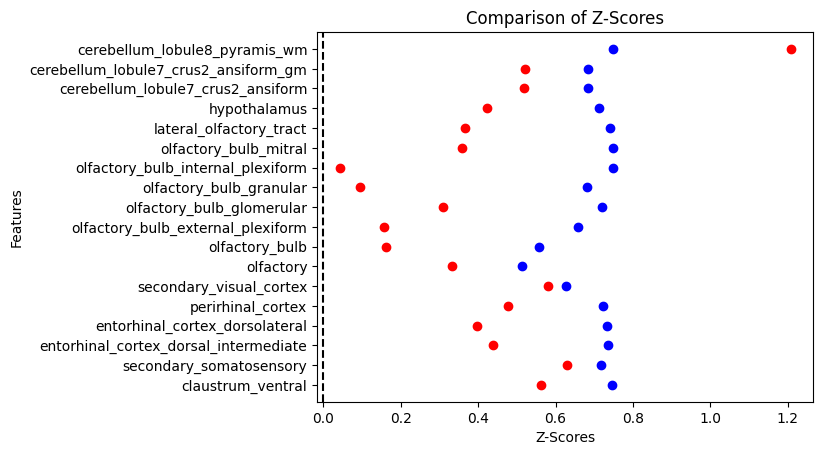

In [ ]:
plt.scatter(wb_z_df, col_name ,color = 'blue', label = "WB")
plt.scatter(t2_z_df, col_name ,color = 'red', label = "WB")
plt.axvline(0, color='black', linestyle='--')


plt.xlabel('Z-Scores')
plt.ylabel('Features')
plt.title('Comparison of Z-Scores')
plt.show()

In [ ]:
difference_df[col_name].describe()


count    18.000000
mean      0.587632
std       0.694577
min       0.007808
25%       0.111586
50%       0.341430
75%       0.684629
max       2.468994
Name: mean, dtype: float64

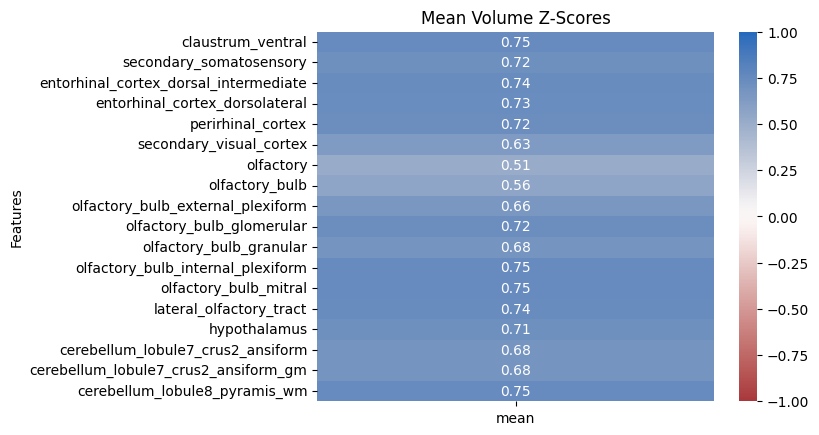

In [ ]:
#plt.scatter(wb_z_df, col_name ,color = 'blue', label = "WB")
#plt.scatter(t2_z_df, col_name ,color = 'red', label = "WB")

#features = ['Clastrum Ventral','Secondary Somatosensory','Entohinal Cortex Dorsal Intermediate','Entohinal Cortex Dorsal Dorsolateral','Perirhinal Cortex','Secondary Visual Cortex','Olfactory','Olfactory Bulb', 'Olfactory Bulb External Plexiform','Olfactory Bulb Glomerular','Olfactory Bulb Granular','Olfactory Bulb Internal Plexiform','Olfactory Bulb Mitral','Lateral Olfactory Tract','Hypothalamus','Cerebellum lobule VII Crus II anisoform','Cerebellum lobule VII anisoform (gray matter)','Cerebellum lobule VII pyramis(white matter)']


sns.heatmap(wb_z_df, cmap=cmap, vmax= 1, vmin=-1, annot=True)


plt.ylabel('Features')
plt.title('Mean Volume Z-Scores')
plt.show()

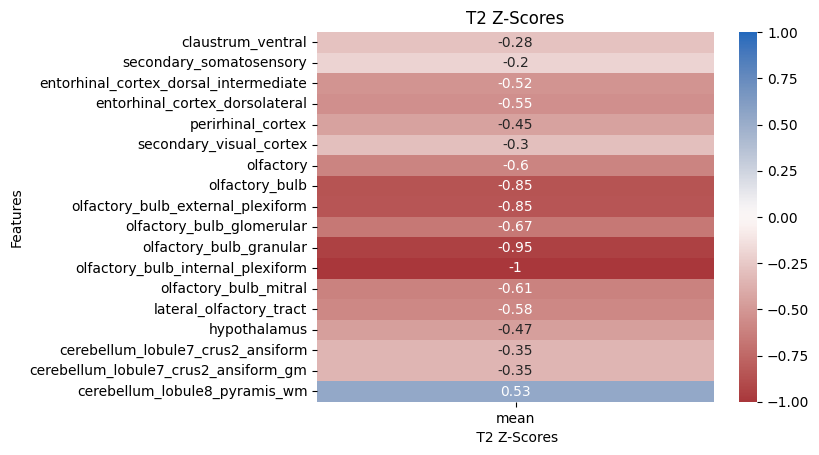

In [ ]:
sns.heatmap(t2_z_df, cmap=cmap, vmax= 1, vmin=-1, annot=True)

plt.xlabel(' T2 Z-Scores')
plt.ylabel('Features')
plt.title('T2 Z-Scores')
plt.show()

In [ ]:
#change this to differences 
wb_a1 = (((wb_data.iloc[0] - wb_data.iloc[6])  ))
wb_a2 = (((wb_data.iloc[1] - wb_data.iloc[7]) ))
wb_a3 = (((wb_data.iloc[2] - wb_data.iloc[8])  ))
wb_a4 =  (((wb_data.iloc[3] - wb_data.iloc[9]) ))
wb_a5 =  (((wb_data.iloc[4] - wb_data.iloc[10])  ))
wb_a6 =  (((wb_data.iloc[5] - wb_data.iloc[11])  ))




#significance comes from p values
wb_diff_df = pd.DataFrame([wb_a1, wb_a2, wb_a3, wb_a4, wb_a5, wb_a6])
wb_diff_df =wb_diff_df[col_name]


wb_diff_df = wb_diff_df.describe().iloc[1]
wb_diff_df = pd.DataFrame(wb_diff_df)

In [ ]:
wb_a1 = (((t2_data.iloc[0] - t2_data.iloc[6]) ))
wb_a2 = (((t2_data.iloc[1] - t2_data.iloc[7])))
wb_a3 = (((t2_data.iloc[2] - t2_data.iloc[8]) ))
wb_a4 =  (((t2_data.iloc[3] - t2_data.iloc[9]) ))
wb_a5 =  (((t2_data.iloc[4] - t2_data.iloc[10])  ))
wb_a6 =  (((t2_data.iloc[5] - t2_data.iloc[11]) ))





#significance comes from p values
t2_diff_df = pd.DataFrame([wb_a1, wb_a2, wb_a3, wb_a4, wb_a5, wb_a6])
t2_diff_df =t2_diff_df[col_name]


t2_diff_df = t2_diff_df.describe().iloc[1]
t2_diff_df = pd.DataFrame(t2_diff_df)

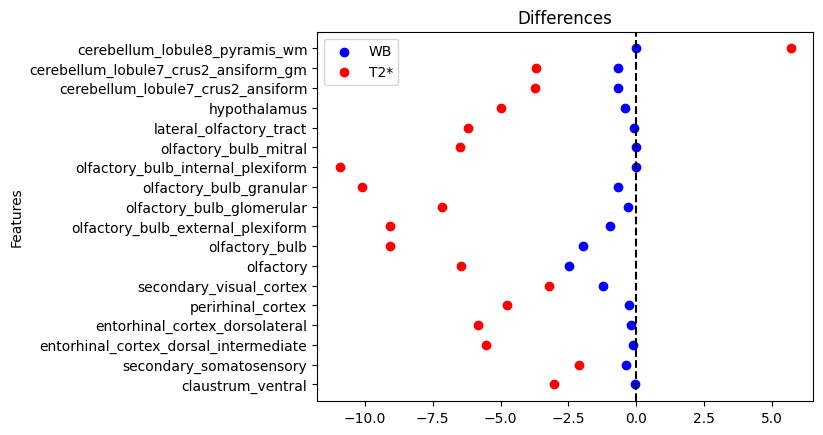

In [ ]:
plt.scatter(wb_diff_df, col_name ,color = 'blue', label = "WB")
plt.scatter(t2_diff_df , col_name ,color = 'red', label = "T2*")


#plt.errorbar(wb_diff_df,t2_diff_df , yerr= 5.345428, fmt='o')
plt.axvline(0, color='black', linestyle='--')






plt.xlabel('')
plt.ylabel('Features')
plt.title('Differences')
plt.legend()
plt.show()

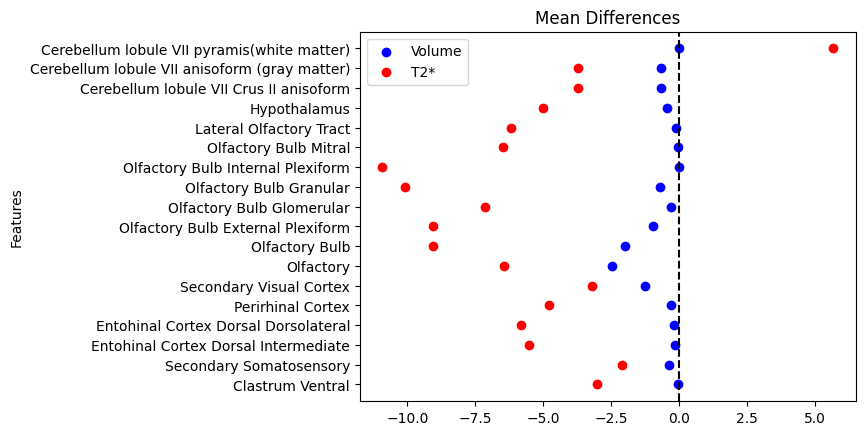

In [ ]:
features = ['Clastrum Ventral','Secondary Somatosensory','Entohinal Cortex Dorsal Intermediate','Entohinal Cortex Dorsal Dorsolateral','Perirhinal Cortex','Secondary Visual Cortex','Olfactory','Olfactory Bulb', 'Olfactory Bulb External Plexiform','Olfactory Bulb Glomerular','Olfactory Bulb Granular','Olfactory Bulb Internal Plexiform','Olfactory Bulb Mitral','Lateral Olfactory Tract','Hypothalamus','Cerebellum lobule VII Crus II anisoform','Cerebellum lobule VII anisoform (gray matter)','Cerebellum lobule VII pyramis(white matter)']


plt.scatter(wb_diff_df, features,color = 'blue', label = "Volume")
plt.scatter(t2_diff_df , features ,color = 'red', label = "T2*")


#Create a threshold at 0 to show the mean differences 
plt.axvline(0, color='black', linestyle='--')






plt.xlabel('')
plt.ylabel('Features')
plt.title('Mean Differences')
plt.legend()
plt.show()

In [ ]:
t2_diff_df['cerebellum_lobule8_pyramis_wm'].describe()

count     6.000000
mean      5.678554
std       4.890663
min      -1.099884
25%       2.519372
50%       6.453334
75%       8.002314
max      12.537851
Name: cerebellum_lobule8_pyramis_wm, dtype: float64

In [ ]:
#Building a list of all the standard deviations from each of the statistically significant subanatomic regions 
#These would be for building another graph to show these differences 

#These visuals were omitted from the final paper


wb_std = [0.03069,0.3881,0.027698,0.0889,0.0737,0.437,1.266,0.836,0.416074,0.167461,0.262396,0.009230,0.017002,0.055066,0.457688,0.234971,0.228923,0.003905]

t2_std = [2.794747,2.634073,6.525905,5.690648,6.525892,4.023584,3.707410,4.984838,4.571929,5.582268,5.580510,5.118941,5.205648,4.40348,2.875952,3.266724,3.201085,4.890663]

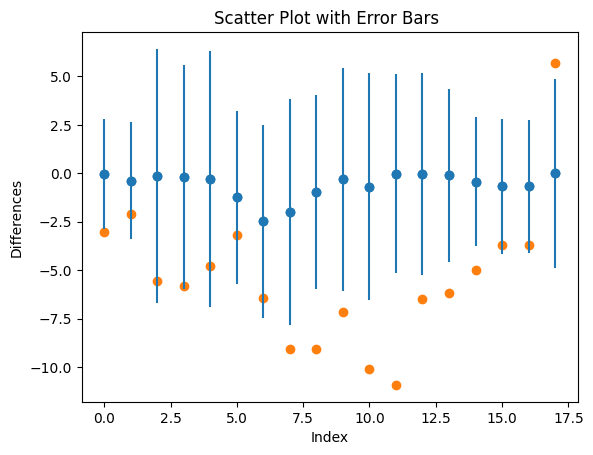

In [ ]:
import matplotlib.pyplot as plt

# Sample data (assuming these represent differences between control and experimental)
differences = [-0.035962, -0.381010, -0.134411, -0.190395, -0.277405, -1.240107, -2.468994, -1.982158, -0.956246, -0.301849, -0.687779, -0.010901, -0.025382, -0.103978, -0.430773, -0.675177, -0.667042, -0.007808]

# Error values (provided standard deviations)
wb_std = [0.03069,0.3881,0.027698,0.0889,0.0737,0.437,1.266,0.836,0.416074,0.167461,0.262396,0.009230,0.017002,0.055066,0.457688,0.234971,0.228923,0.003905]
t2_std = [2.794747,2.634073,6.525905,5.690648,6.525892,4.023584,3.707410,4.984838,4.571929,5.582268,5.580510,5.118941,5.205648,4.40348,2.875952,3.266724,3.201085,4.890663]

# Calculate total error (assuming equal variances)
combined_std_dev = [wb_std[i] + t2_std[i] for i in range(len(differences))]

# Create the plot
plt.scatter(range(len(wb_diff_df)), wb_diff_df)
plt.scatter(range(len(t2_diff_df)), t2_diff_df)
plt.errorbar(range(len(differences)), differences, yerr=combined_std_dev, fmt='o')
plt.errorbar(range(len(differences)), differences, yerr=combined_std_dev, fmt='o')

plt.xlabel('Index')
plt.ylabel('Differences')
plt.title('Scatter Plot with Error Bars ')
plt.show()

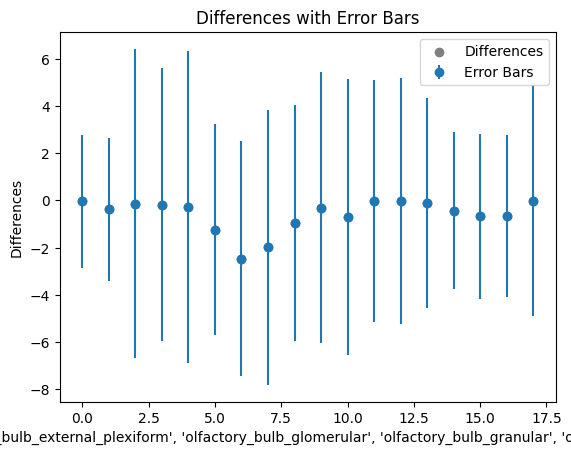

In [ ]:
import matplotlib.pyplot as plt

# Assuming wb_diff_df and t2_diff_df contain differences, wb_std contains control standard deviation, and t2_std contains experimental standard deviation

# Extract z-scores and create x-axis
  # Assuming 'z_scores' is the column name for differences
x_axis = range(len(differences))  # Use index for x-axis

# Calculate combined error bars (assuming equal variances)
combined_std_dev = [wb_std[i] + t2_std[i] for i in range(len(differences))]

# Create a scatter plot with error bars
plt.scatter(x_axis, differences, color='grey', label='Differences')  # Consider adding a color
plt.errorbar(x_axis, differences, yerr=combined_std_dev, fmt='o', label='Error Bars')  # Use wb_diff_df for x-axis

# Adjust labels and title
plt.xlabel(col_name)  
plt.ylabel('Differences')
plt.title('Differences with Error Bars')

# Add legend
plt.legend()

plt.show()

ValueError: operands could not be broadcast together with shapes (18,1) (2,18) 

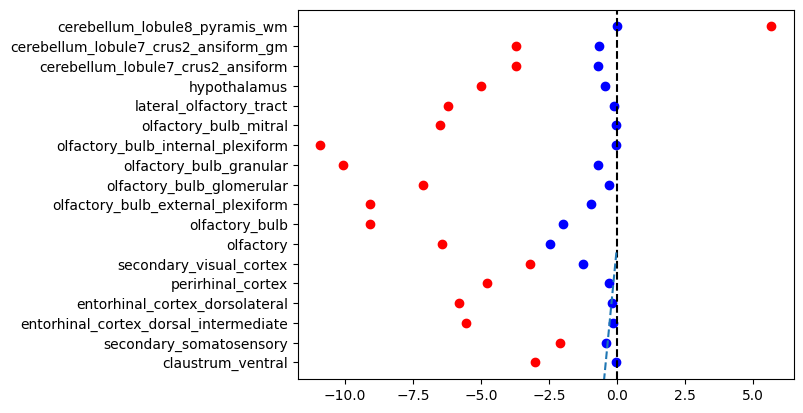

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(wb_diff_df, col_name ,color = 'blue', label = "WB")
plt.scatter(t2_diff_df , col_name ,color = 'red', label = "T2*")


#plt.errorbar(wb_diff_df,t2_diff_df , yerr= 5.345428, fmt='o')
plt.axvline(0, color='black', linestyle='--')


#trying to pass the average standard deviation as the error 
combined_std_dev = [2.825437,3.022173,6.553603,5.779548,6.599592,4.460584,4.973410,5.820838,4.988003,5.749729,5.842906,5.128171,5.222650,4.458546,3.333640,3.501695,3.430008,4.894568]

plt.errorbar(wb_diff_df, t2_diff_df , xerr=combined_std_dev, fmt='--')


plt.xlabel('')
plt.ylabel('Features')
plt.title('Differences')
plt.legend()
plt.show()

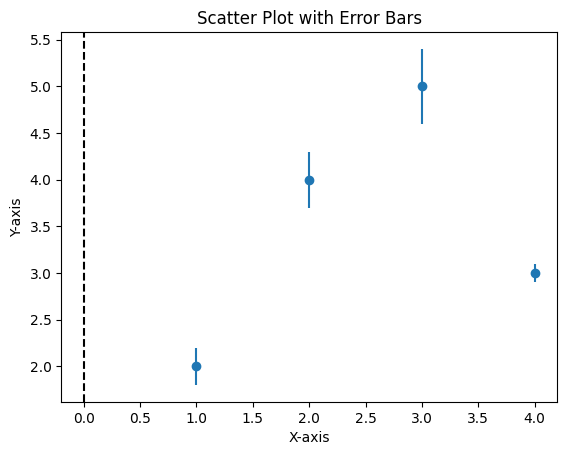

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [2, 4, 5, 3]
std_dev = [0.2, 0.3, 0.4, 0.1]  # Standard deviations

# Create a scatter plot with error bars
plt.errorbar(x, y, yerr=std_dev, fmt='o')

# Add a vertical line at x=0
plt.axvline(0, color='black', linestyle='--')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Error Bars')
plt.show()

In [ ]:
t2_diff_df.describe()

,mean
count,18.000000
mean,-5.365794
std,3.725760
min,-10.920085
25%,-6.977504
50%,-5.672795
75%,-3.706542
max,5.678554


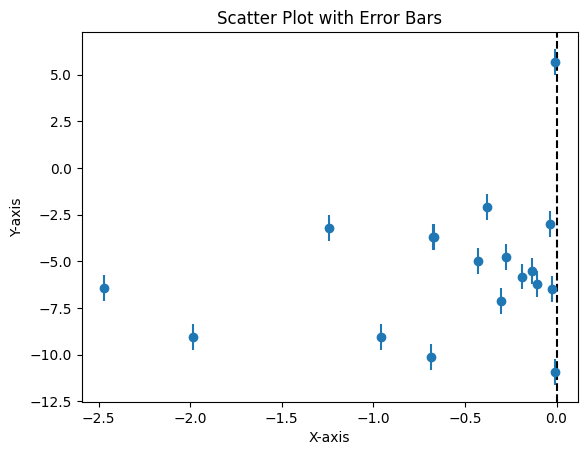

In [ ]:
x =[-0.035962,-0.381010,-0.134411,-0.190395,-0.277405,-1.240107,-2.468994,-1.982158,-0.956246,-0.301849,-0.687779,-0.010901,-0.025382,-0.103978,-0.430773,-0.675177,-0.667042,-0.007808]
y = [-3.014733,-2.098148,-5.534545,-5.811046,-4.770391,-3.203115,-6.441062,-9.071833,-9.067920,-7.139698,-10.094518,-10.920085,-6.490921,-6.197347,-4.988473,-3.715432,-3.703578,5.678554]

std_dev = [0.694577]

plt.errorbar(x, y, yerr=std_dev, fmt='o')

# Add a vertical line at x=0
plt.axvline(0, color='black', linestyle='--')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Error Bars')
plt.show()

In [ ]:
y = [-3.014733,-2.098148,-5.534545,-5.811046,-4.770391,-3.203115,-6.441062,-9.071833,-9.067920,-7.139698,-10.094518,-10.920085,-6.490921,-6.197347,-4.988473,-3.715432,-3.703578,5.678554]


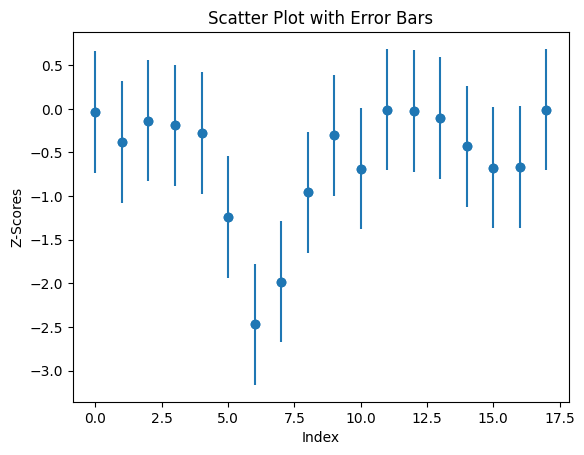

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
data = {'z_scores': [-0.035962, -0.381010, -0.134411, -0.190395, -0.277405, -1.240107, -2.468994, -1.982158, -0.956246, -0.301849, -0.687779, -0.010901, -0.025382, -0.103978, -0.430773, -0.675177, -0.667042, -0.007808]}
df = pd.DataFrame(data)

# Extract z-scores and create a corresponding list of indices
z_scores = df['z_scores']
x_axis = range(len(z_scores))

# Assume error values are constant (adjust if needed)
error_bars = [0.694577] * len(z_scores)  # Replace 0.1 with your desired error value

# Create a scatter plot with error bars
plt.scatter(x_axis, z_scores)
plt.errorbar(x_axis, z_scores, yerr=error_bars, fmt='o')

plt.xlabel('Index')
plt.ylabel('Z-Scores')
plt.title('Scatter Plot with Error Bars')
plt.show()

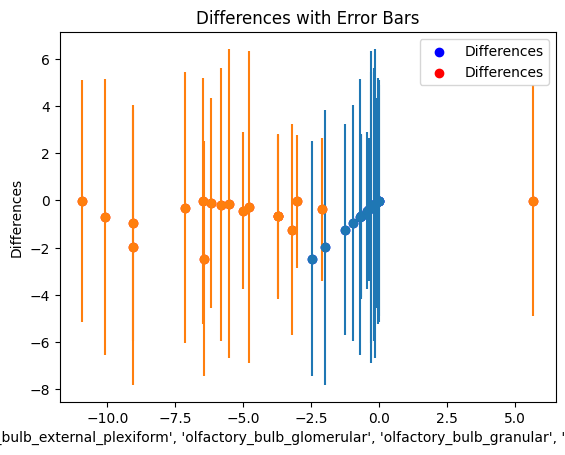

In [ ]:
import matplotlib.pyplot as plt

# Assuming wb_diff_df and t2_diff_df contain differences, wb_std contains control standard deviation, and t2_std contains experimental standard deviation

# Extract z-scores and create x-axis
  # Assuming 'z_scores' is the column name for differences
  # Use index for x-axis

# Calculate combined error bars (assuming equal variances)

combined_std_dev = [2.825437,3.022173,6.553603,5.779548,6.599592,4.460584,4.973410,5.820838,4.988003,5.749729,5.842906,5.128171,5.222650,4.458546,3.333640,3.501695,3.430008,4.894568]
# Create a scatter plot with error bars

plt.scatter(wb_diff_df, differences, color='blue', label='Differences')  # Consider adding a color
plt.scatter(t2_diff_df, differences, color='red', label='Differences')  # Consider adding a color

plt.errorbar(wb_diff_df, differences, yerr=combined_std_dev, fmt='o')  # Use wb_diff_df for x-axis
plt.errorbar(t2_diff_df, differences, yerr=combined_std_dev, fmt='o')  # Use wb_diff_df for x-axis

# Adjust labels and title
plt.xlabel(col_name)  
plt.ylabel('Differences')
plt.title('Differences with Error Bars')

# Add legend
plt.legend()

plt.show()

In [ ]:
wb_z_df 

,mean
claustrum_ventral,0.746836
secondary_somatosensory,0.718101
entorhinal_cortex_dorsal_intermediate,0.736386
entorhinal_cortex_dorsolateral,0.731722
perirhinal_cortex,0.721840
secondary_visual_cortex,0.626076
olfactory,0.514295
olfactory_bulb,0.557058
olfactory_bulb_external_plexiform,0.657570
olfactory_bulb_glomerular,0.721156


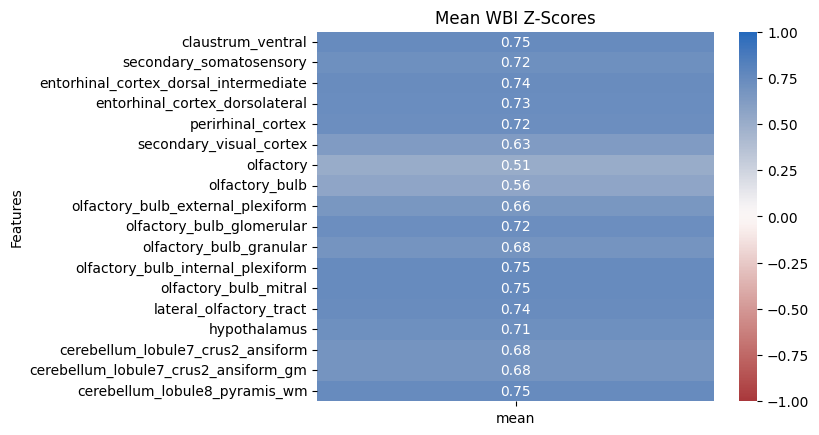

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your code defining wb_z_df, cmap, etc.)

# Increase figure size (optional)
# Adjust width and height as needed
features = ['Clastrum Ventral','Secondary Somatosensory','Entohinal Cortex Dorsal Intermediate','Entohinal Cortex Dorsal Dorsolateral','Perirhinal Cortex','Secondary Visual Cortex','Olfactory','Olfactory Bulb', 'Olfactory Bulb External Plexiform','Olfactory Bulb Glomerular','Olfactory Bulb Granular','Olfactory Bulb Internal Plexiform','Olfactory Bulb Mitral','Lateral Olfactory Tract','Hypothalamus','Cerebellum lobule VII Crus II anisoform','Cerebellum lobule VII anisoform (gray matter)','Cerebellum lobule VII pyramis(white matter)']


wb_z_df_rename = wb_z_df.rename(columns={'clastrum_ventral':'Clastrum Ventral',
                                       'secondary_somatosensory':'Secondary Somatosensory',
                                       'entorhinal_cortex_dorsal_intermediate':'Entohinal Cortex Dorsal Intermediate',
                                       'perirhinal_cortex':'Perirhinal Cortex',
                                       'secondary_visual_cortex':'Secondary Visual Cortex'}) 

sns.heatmap(wb_z_df_rename, cmap=cmap, vmax=1, vmin=-1, annot=True)

plt.ylabel('Features')
plt.title('Mean WBI Z-Scores')
plt.show()